In [2]:
import pandas as pd

# Load the data
file_path = "C:\\Users\\myasu\\Downloads\\elec-fossil-nuclear-renewables (1).csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()


,Entity,Code,Year,Electricity from renewables - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables),Electricity from nuclear - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables),Electricity from fossil fuels - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)
0,ASEAN (Ember),NaN,2000,73.25,0.0,305.36
1,ASEAN (Ember),NaN,2001,77.19,0.0,327.66
2,ASEAN (Ember),NaN,2002,76.52,0.0,356.67
3,ASEAN (Ember),NaN,2003,76.40,0.0,381.84
4,ASEAN (Ember),NaN,2004,77.96,0.0,418.60


In [3]:
# Filter the data for Brazil and India
countries = ["Brazil", "India"]
df_filtered = df[df['Entity'].isin(countries)]

# Display the filtered data
df_filtered.head()


,Entity,Code,Year,Electricity from renewables - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables),Electricity from nuclear - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables),Electricity from fossil fuels - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)
831,Brazil,BRA,1990,210.56706,2.237,10.016053
832,Brazil,BRA,1991,221.78162,1.442,11.152684
833,Brazil,BRA,1992,228.27237,1.759,11.730592
834,Brazil,BRA,1993,240.04893,0.442,11.512184
835,Brazil,BRA,1994,248.09332,0.055,11.892286


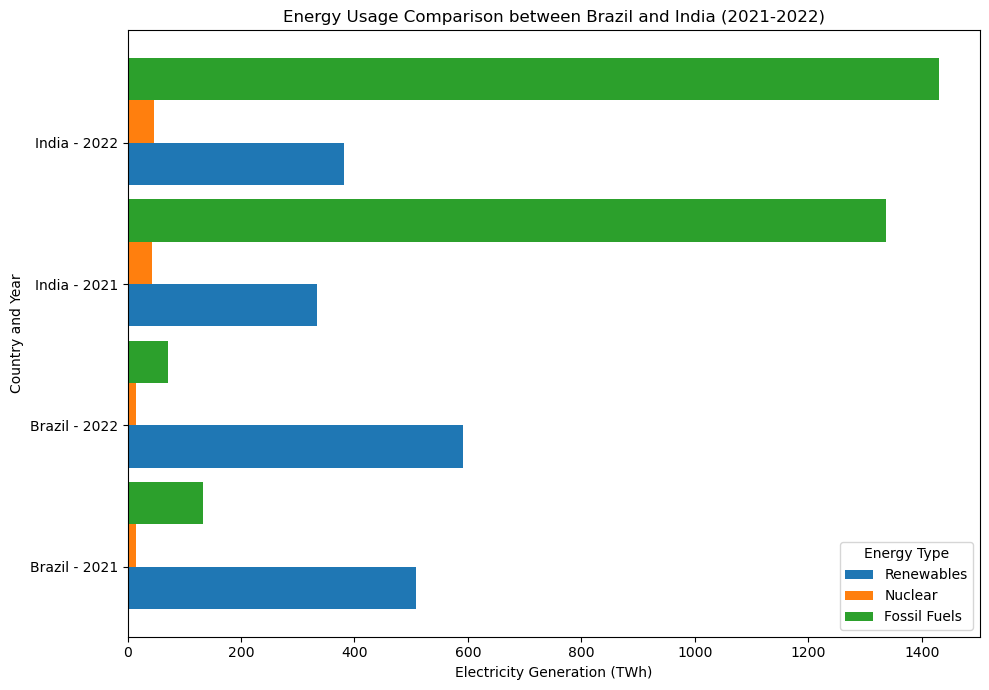

In [4]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter the data for the years 2021 and 2022
df_filtered = df_filtered[df_filtered['Year'].isin([2021, 2022])]

# Adjust the value_vars based on the actual column names
value_vars = ["Electricity from renewables - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)",
              "Electricity from nuclear - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)",
              "Electricity from fossil fuels - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)"]

# Melt the dataframe for easier plotting with matplotlib
df_melted = df_filtered.melt(id_vars=["Entity", "Year"], 
                             value_vars=value_vars, 
                             var_name="Energy Type", 
                             value_name="TWh")

# Rename energy types for better readability
df_melted["Energy Type"] = df_melted["Energy Type"].str.replace(" - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)", "")

# Pivot the dataframe for grouped bar chart
df_pivot = df_melted.pivot_table(index=["Entity", "Year"], columns="Energy Type", values="TWh").reset_index()

# Plotting
plt.figure(figsize=(10, 7))

# Grouped horizontal bar chart
bar_width = 0.3
index = df_pivot.index
bar1 = plt.barh(index - bar_width/2, df_pivot["Electricity from renewables"], bar_width, label='Renewables')
bar2 = plt.barh(index + bar_width/2, df_pivot["Electricity from nuclear"], bar_width, label='Nuclear')
bar3 = plt.barh(index + bar_width*3/2, df_pivot["Electricity from fossil fuels"], bar_width, label='Fossil Fuels')

# Customize the plot
plt.title("Energy Usage Comparison between Brazil and India (2021-2022)")
plt.ylabel("Country and Year")
plt.xlabel("Electricity Generation (TWh)")
plt.yticks(index, [f"{row['Entity']} - {row['Year']}" for _, row in df_pivot.iterrows()])
plt.legend(title="Energy Type")
plt.tight_layout()
plt.show()


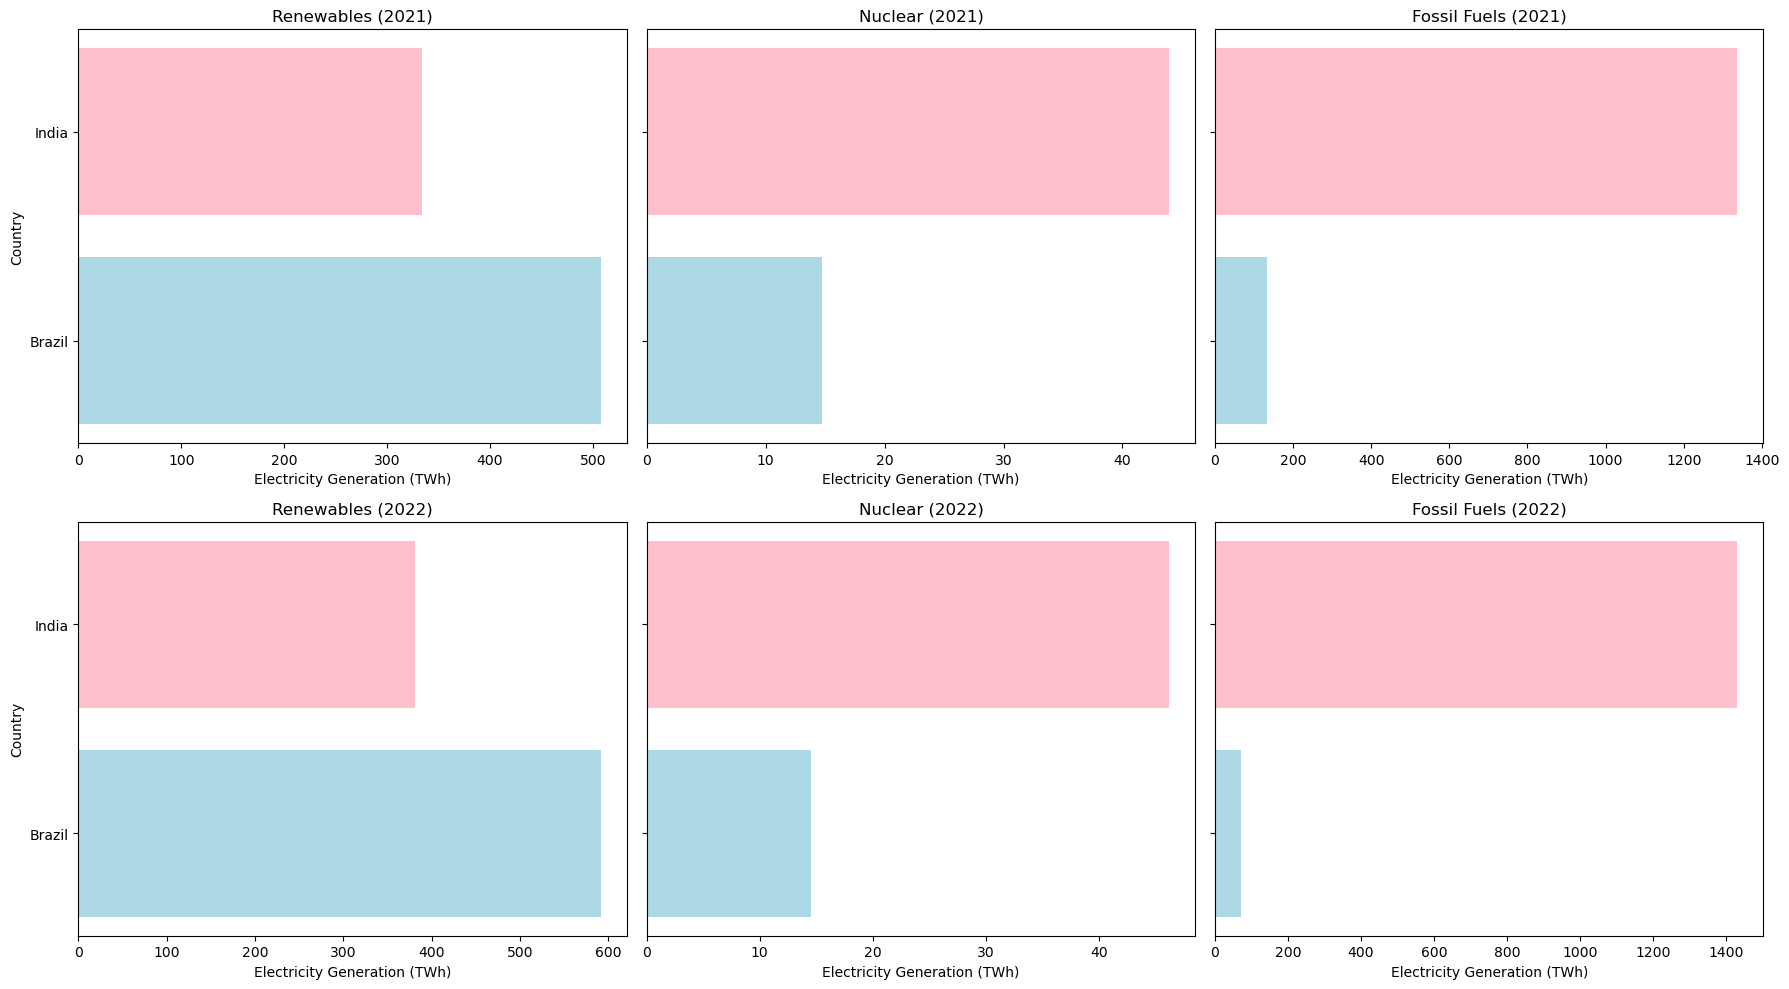

In [5]:
import pandas as pd
import matplotlib.pyplot as plt



# Adjust the value_vars based on the actual column names
value_vars = ["Electricity from renewables - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)",
              "Electricity from nuclear - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)",
              "Electricity from fossil fuels - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)"]

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)

# Iterate over years
for i, year in enumerate([2021, 2022]):
    # Filter the data for the current year
    df_year = df_filtered[df_filtered['Year'] == year]
    
    # Melt the dataframe for easier plotting with matplotlib
    df_melted = df_year.melt(id_vars=["Entity"], 
                             value_vars=value_vars, 
                             var_name="Energy Type", 
                             value_name="TWh")
    
    # Pivot the dataframe for grouped bar chart
    df_pivot = df_melted.pivot_table(index=["Entity"], columns="Energy Type", values="TWh").reset_index()
    
    # Grouped horizontal bar chart for Renewables
    axes[i, 0].barh(df_pivot["Entity"], df_pivot["Electricity from renewables - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)"], color=['lightblue', 'pink'])
    axes[i, 0].set_title(f'Renewables ({year})')
    axes[i, 0].set_xlabel('Electricity Generation (TWh)')
    axes[i, 0].set_ylabel('Country')
    axes[i, 0].invert_yaxis()

    # Grouped horizontal bar chart for Nuclear
    axes[i, 1].barh(df_pivot["Entity"], df_pivot["Electricity from nuclear - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)"], color=['lightblue', 'pink'])
    axes[i, 1].set_title(f'Nuclear ({year})')
    axes[i, 1].set_xlabel('Electricity Generation (TWh)')
    axes[i, 1].invert_yaxis()

    # Grouped horizontal bar chart for Fossil Fuels
    axes[i, 2].barh(df_pivot["Entity"], df_pivot["Electricity from fossil fuels - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)"], color=['lightblue', 'pink'])
    axes[i, 2].set_title(f'Fossil Fuels ({year})')
    axes[i, 2].set_xlabel('Electricity Generation (TWh)')
    axes[i, 2].invert_yaxis()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [7]:
import pandas as pd

# Load the data
file_path = "C:\\Users\\myasu\\Downloads\\elec-fossil-nuclear-renewables (1).csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(df.head())
print(df.columns)


          Entity Code  Year  \
0  ASEAN (Ember)  NaN  2000   
1  ASEAN (Ember)  NaN  2001   
2  ASEAN (Ember)  NaN  2002   
3  ASEAN (Ember)  NaN  2003   
4  ASEAN (Ember)  NaN  2004   

   Electricity from renewables - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)  \
0                                              73.25                                                       
1                                              77.19                                                       
2                                              76.52                                                       
3                                              76.40                                                       
4                                              77.96                                                       

   Electricity from nuclear - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)  \
0                                                0.0       

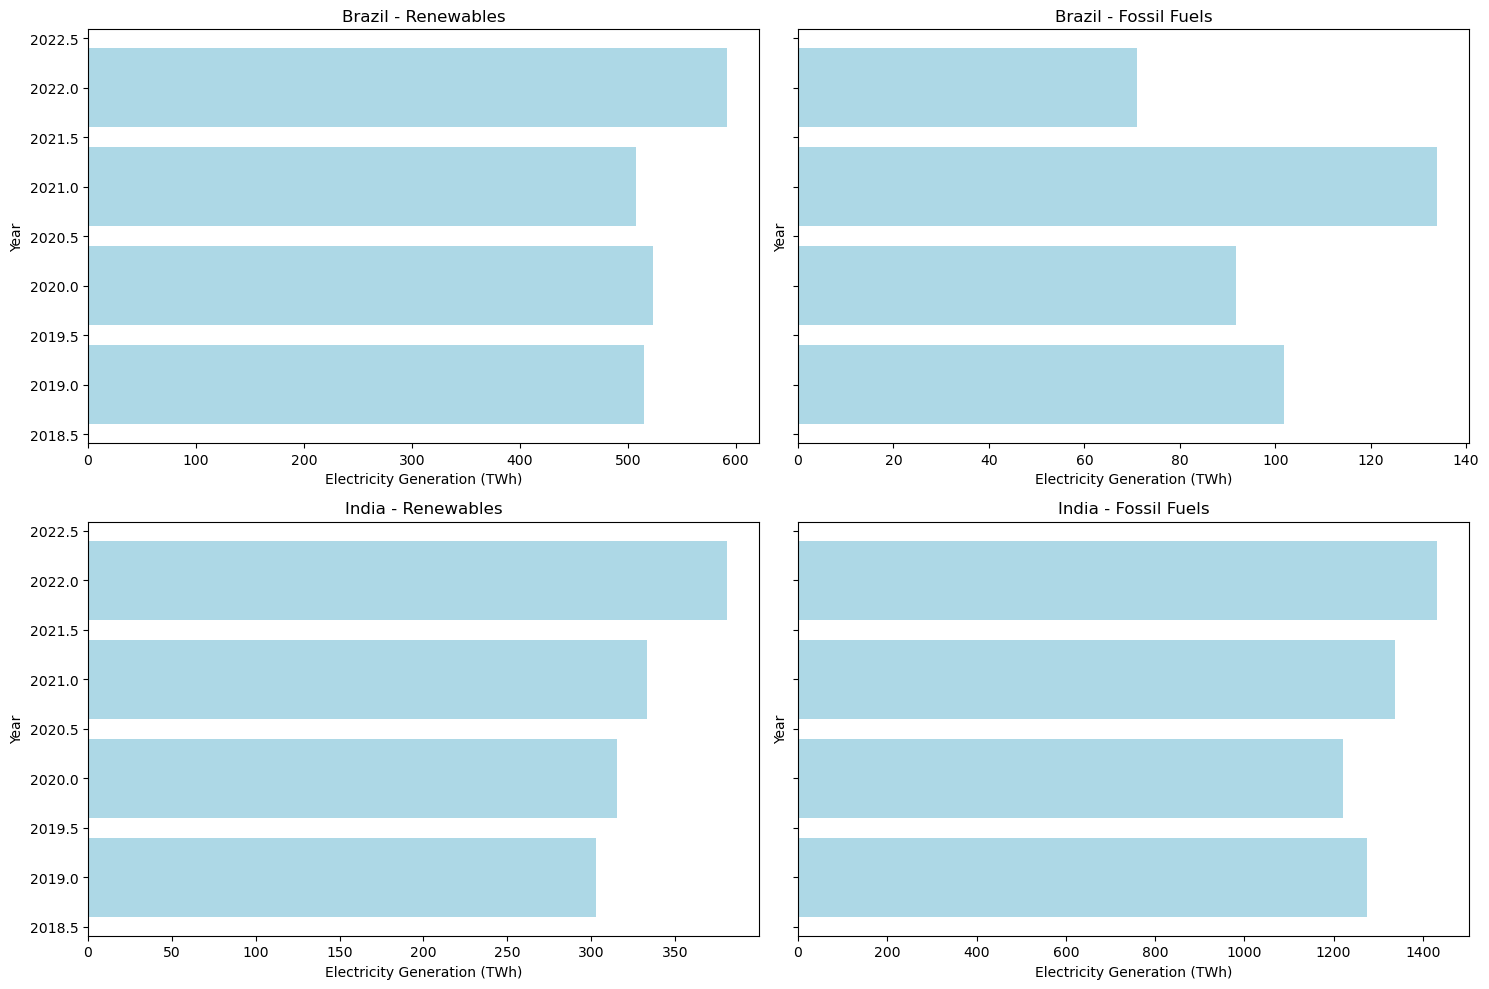

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "C:\\Users\\myasu\\Downloads\\elec-fossil-nuclear-renewables (1).csv"
df = pd.read_csv(file_path)

# Filter the data for Brazil and India for the years 2019-2022
df_filtered = df[(df['Entity'].isin(['Brazil', 'India'])) & (df['Year'].between(2019, 2022))]

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)

# Define the subplots configurations
configs = [
    ('Brazil', 'Electricity from renewables - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', 'Brazil - Renewables'),
    ('Brazil', 'Electricity from fossil fuels - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', 'Brazil - Fossil Fuels'),
    ('India', 'Electricity from renewables - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', 'India - Renewables'),
    ('India', 'Electricity from fossil fuels - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', 'India - Fossil Fuels')
]

# Iterate over each subplot configuration
for i, (entity, value_var, title) in enumerate(configs):
    # Filter data for the specific entity and years
    df_entity = df_filtered[df_filtered['Entity'] == entity]
    
    # Create the plot
    ax = axes[i // 2, i % 2]
    ax.barh(df_entity['Year'], df_entity[value_var], color='lightblue')
    ax.set_title(title)
    ax.set_xlabel('Electricity Generation (TWh)')
    ax.set_ylabel('Year')
    ax.invert_yaxis()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


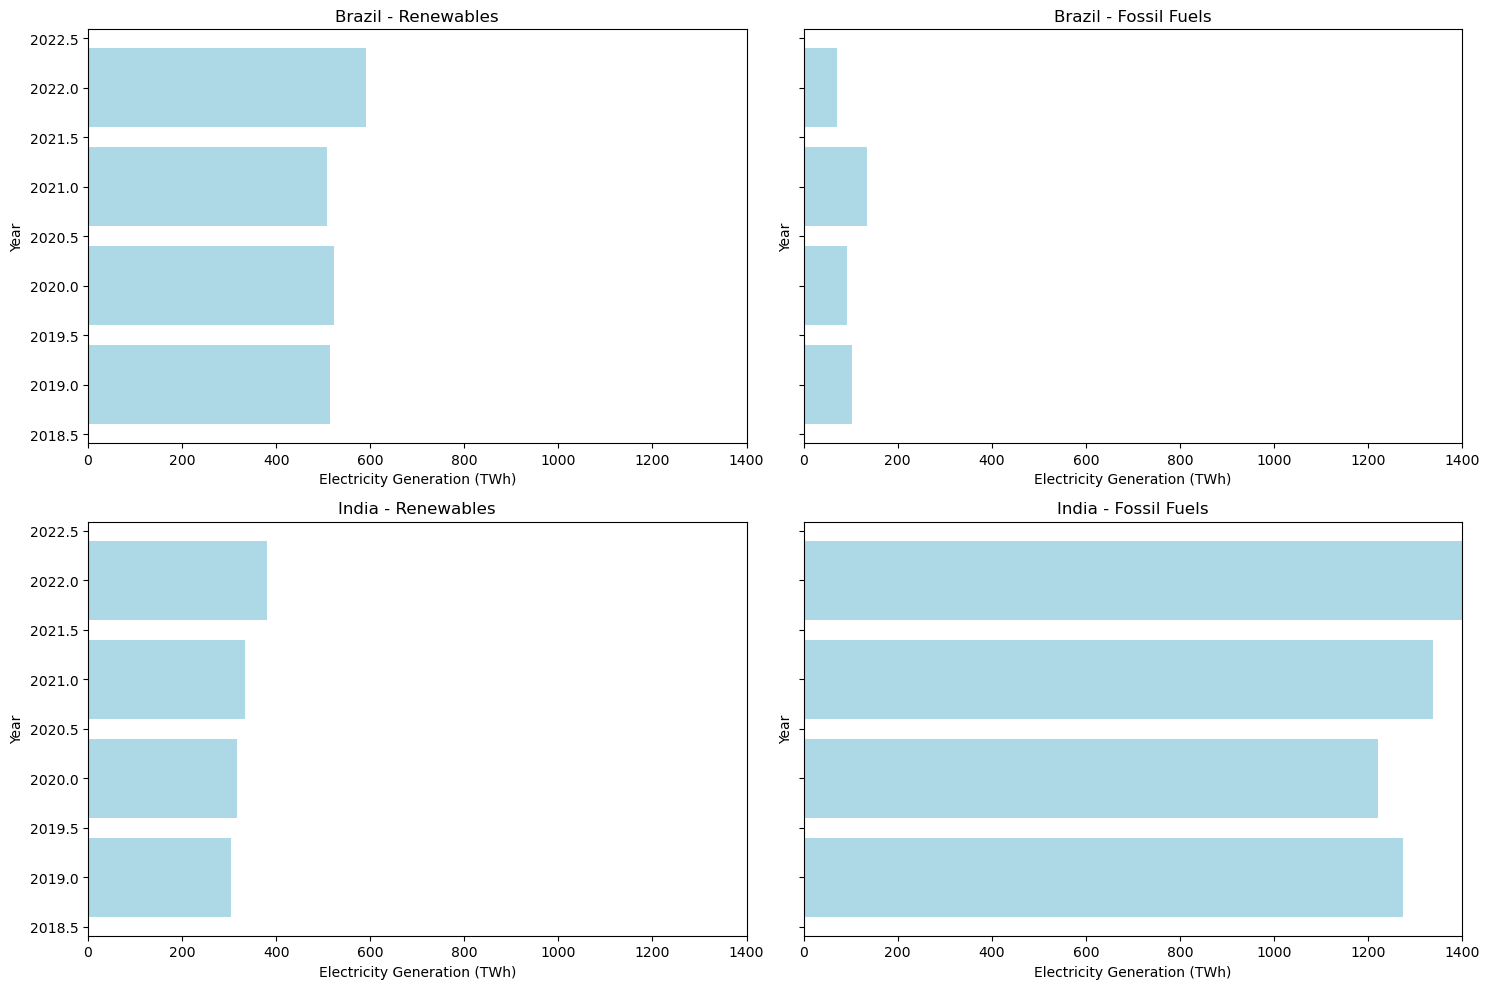

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "C:\\Users\\myasu\\Downloads\\elec-fossil-nuclear-renewables (1).csv"
df = pd.read_csv(file_path)

# Filter the data for Brazil and India for the years 2019-2022
df_filtered = df[(df['Entity'].isin(['Brazil', 'India'])) & (df['Year'].between(2019, 2022))]

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)

# Define the subplots configurations
configs = [
    ('Brazil', 'Electricity from renewables - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', 'Brazil - Renewables'),
    ('Brazil', 'Electricity from fossil fuels - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', 'Brazil - Fossil Fuels'),
    ('India', 'Electricity from renewables - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', 'India - Renewables'),
    ('India', 'Electricity from fossil fuels - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', 'India - Fossil Fuels')
]

# Iterate over each subplot configuration
for i, (entity, value_var, title) in enumerate(configs):
    # Filter data for the specific entity and years
    df_entity = df_filtered[df_filtered['Entity'] == entity]
    
    # Create the plot
    ax = axes[i // 2, i % 2]
    ax.barh(df_entity['Year'], df_entity[value_var], color='lightblue')
    ax.set_title(title)
    ax.set_xlabel('Electricity Generation (TWh)')
    ax.set_ylabel('Year')
    ax.set_xlim(0, 1400)  # Set x-axis limits
    ax.invert_yaxis()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


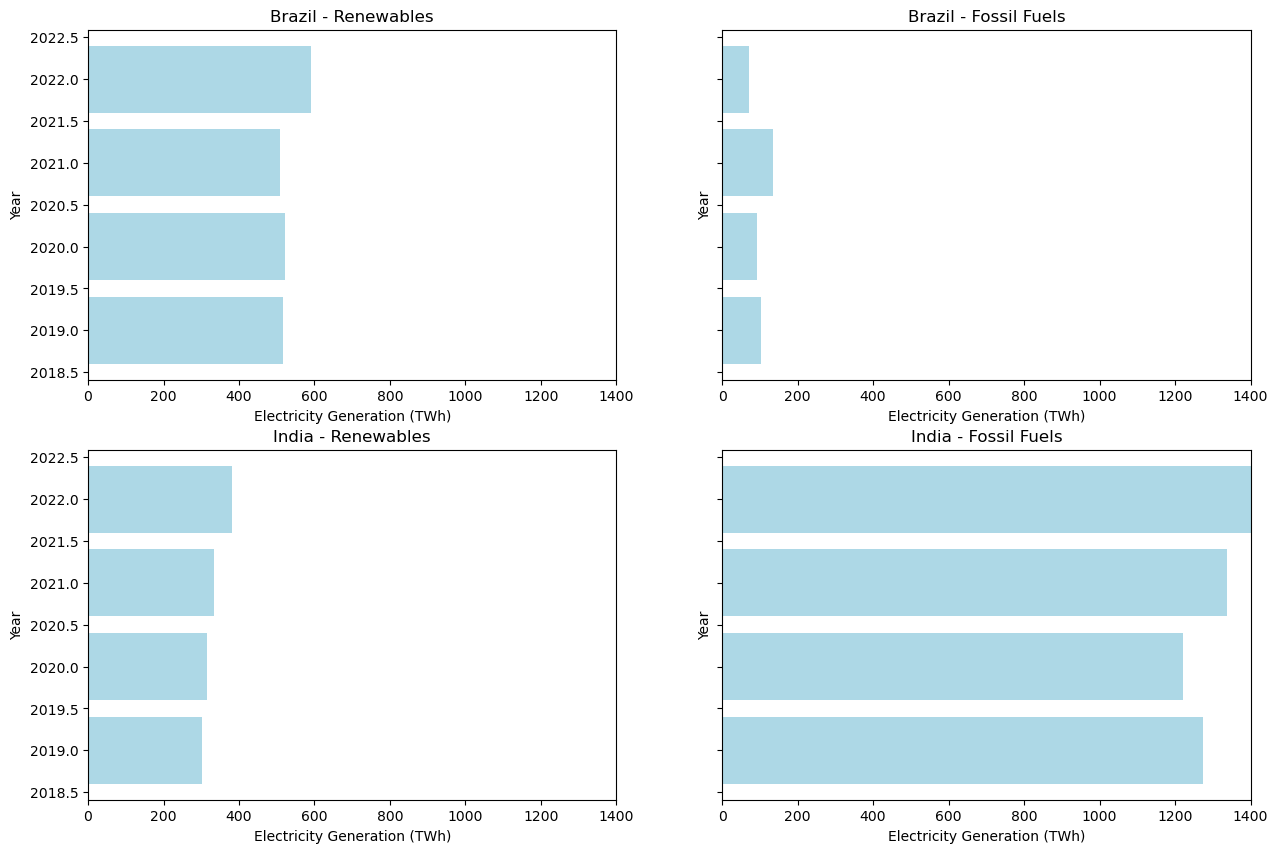

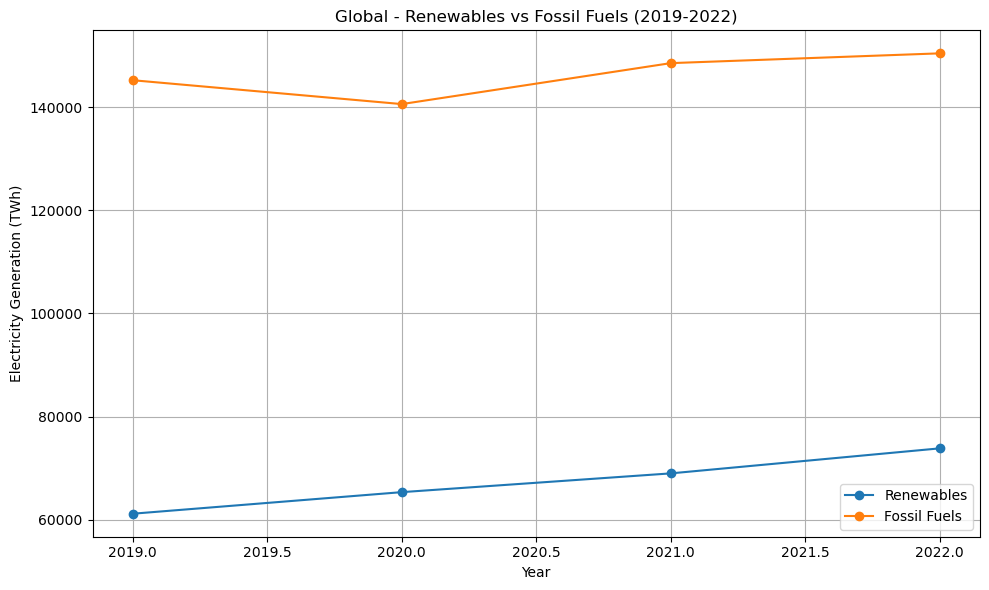

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "C:\\Users\\myasu\\Downloads\\elec-fossil-nuclear-renewables (1).csv"
df = pd.read_csv(file_path)

# Filter the data for years 2019-2022
df_filtered = df[df['Year'].between(2019, 2022)]

# Group by year and sum the values for the entire world
df_global = df_filtered.groupby('Year').sum().reset_index()

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)

# Define the subplots configurations
configs = [
    ('Brazil', 'Electricity from renewables - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', 'Brazil - Renewables'),
    ('Brazil', 'Electricity from fossil fuels - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', 'Brazil - Fossil Fuels'),
    ('India', 'Electricity from renewables - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', 'India - Renewables'),
    ('India', 'Electricity from fossil fuels - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', 'India - Fossil Fuels')
]

# Iterate over each subplot configuration
for i, (entity, value_var, title) in enumerate(configs):
    # Filter data for the specific entity and years
    df_entity = df_filtered[df_filtered['Entity'] == entity]
    
    # Create the plot
    ax = axes[i // 2, i % 2]
    ax.barh(df_entity['Year'], df_entity[value_var], color='lightblue')
    ax.set_title(title)
    ax.set_xlabel('Electricity Generation (TWh)')
    ax.set_ylabel('Year')
    ax.set_xlim(0, 1400)  # Set x-axis limits
    ax.invert_yaxis()

# Set up a new figure for the global comparison plot
plt.figure(figsize=(10, 6))

# Plot line comparison for Global
plt.plot(df_global['Year'], df_global['Electricity from renewables - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)'], label='Renewables', marker='o')
plt.plot(df_global['Year'], df_global['Electricity from fossil fuels - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)'], label='Fossil Fuels', marker='o')
plt.title('Global - Renewables vs Fossil Fuels (2019-2022)')
plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


C:\Users\myasu\AppData\Local\Temp\ipykernel_14500\2897013794.py:45: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


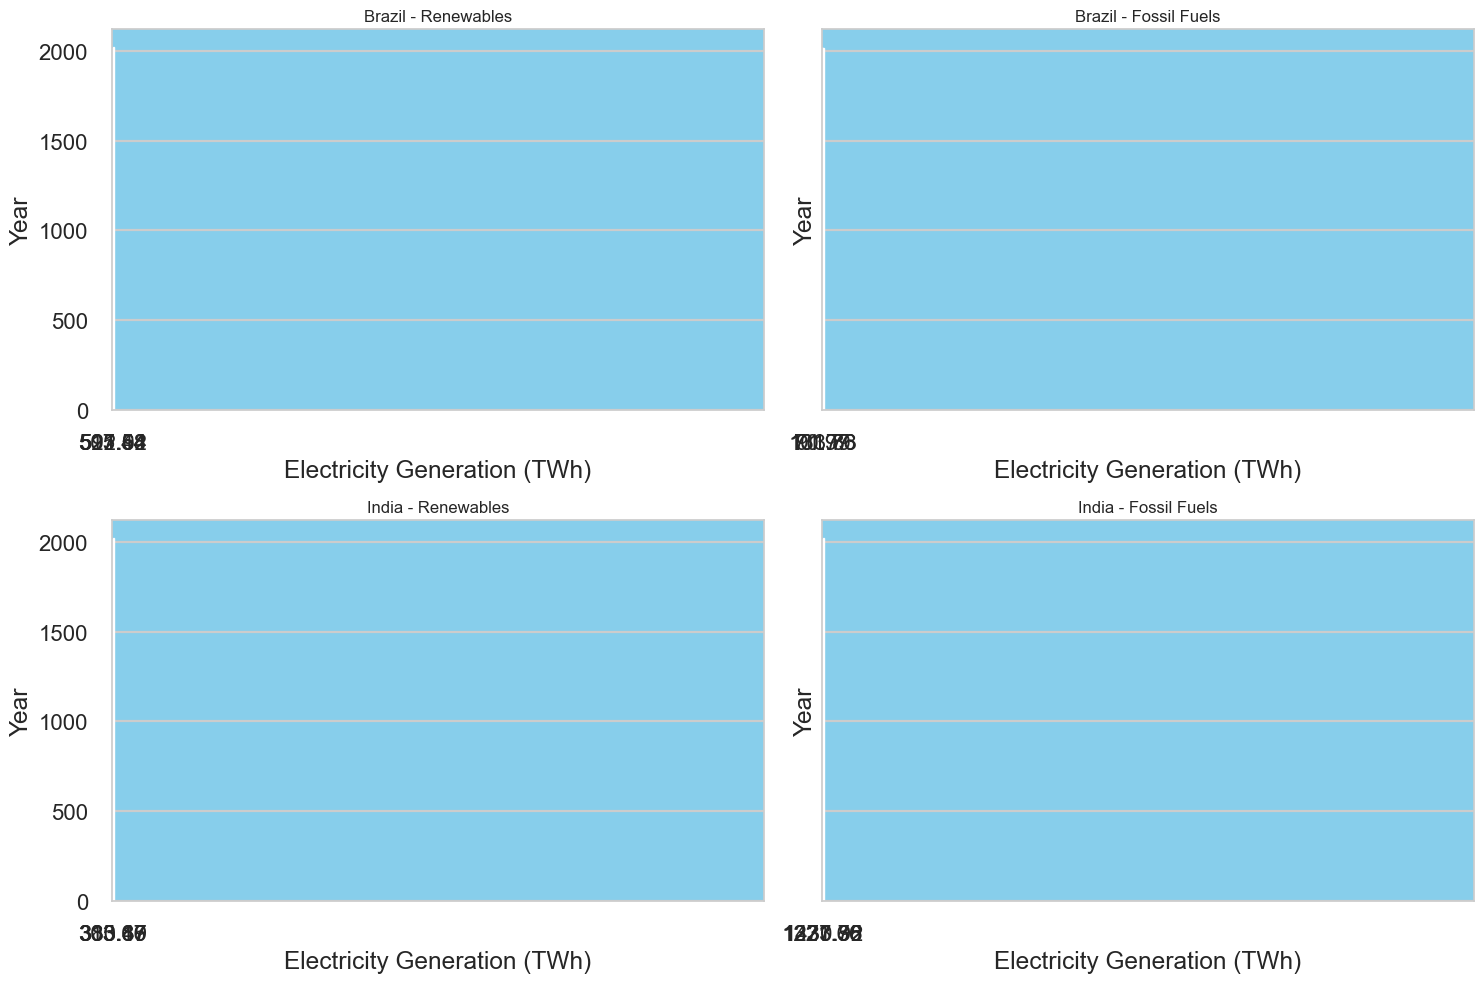

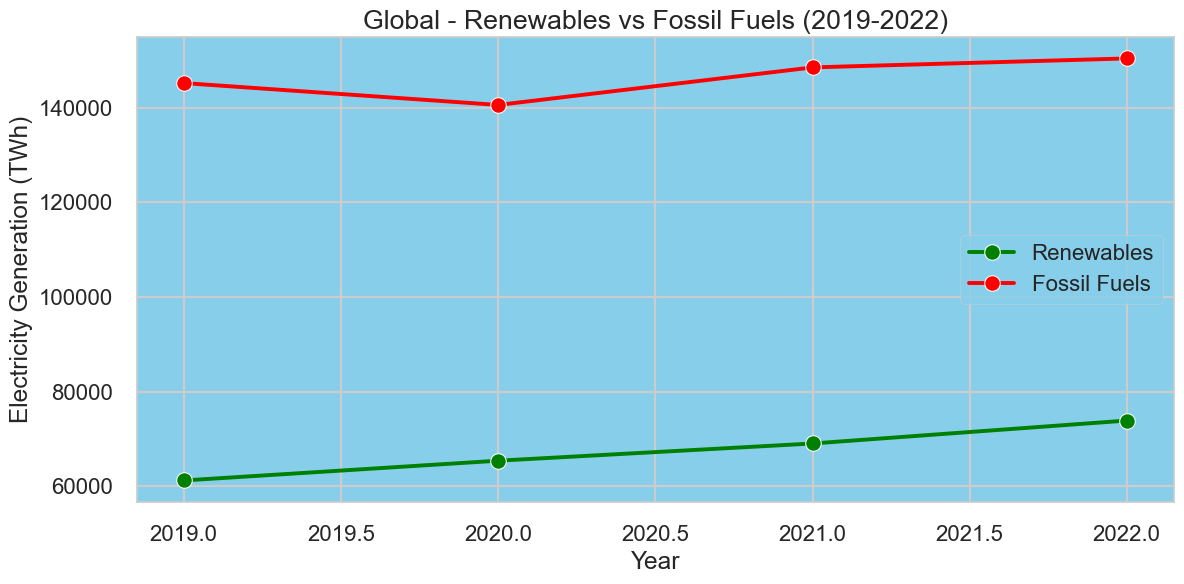

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = "C:\\Users\\myasu\\Downloads\\elec-fossil-nuclear-renewables (1).csv"
df = pd.read_csv(file_path)

# Filter the data for Brazil and India for the years 2019-2022
df_filtered = df[(df['Entity'].isin(['Brazil', 'India'])) & (df['Year'].between(2019, 2022))]

# Filter the data for global aggregation for the years 2019-2022
df_global = df[df['Year'].between(2019, 2022)].groupby('Year').sum().reset_index()

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)
sns.set(style="whitegrid", palette="pastel")

# Define the subplots configurations
configs = [
    ('Brazil', 'Electricity from renewables - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', 'Brazil - Renewables'),
    ('Brazil', 'Electricity from fossil fuels - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', 'Brazil - Fossil Fuels'),
    ('India', 'Electricity from renewables - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', 'India - Renewables'),
    ('India', 'Electricity from fossil fuels - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', 'India - Fossil Fuels')
]

# Iterate over each subplot configuration
for i, (entity, value_var, title) in enumerate(configs):
    # Filter data for the specific entity and years
    df_entity = df_filtered[df_filtered['Entity'] == entity]
    
    # Create the plot
    ax = axes[i // 2, i % 2]
    sns.barplot(x=value_var, y='Year', data=df_entity, ax=ax, color='skyblue')
    ax.set_title(title)
    ax.set_xlabel('Electricity Generation (TWh)')
    ax.set_ylabel('Year')
    ax.set_xlim(0, 1400)  # Set x-axis limits

# Adjust layout
plt.tight_layout()

# Set up a new figure for the global comparison plot
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-poster')
sns.set_style("whitegrid", {'axes.facecolor': 'skyblue'})

# Plot line comparison for Global
sns.lineplot(x='Year', y='Electricity from renewables - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', data=df_global, label='Renewables', marker='o', color='green')
sns.lineplot(x='Year', y='Electricity from fossil fuels - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)', data=df_global, label='Fossil Fuels', marker='o', color='red')
plt.title('Global - Renewables vs Fossil Fuels (2019-2022)')
plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


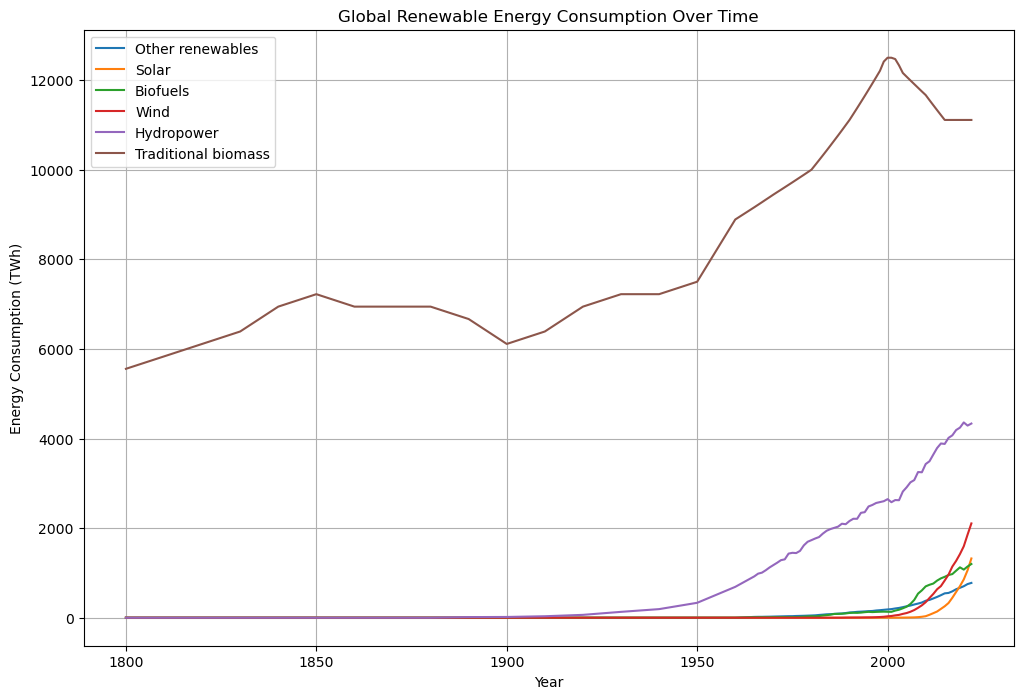

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\myasu\\Downloads\\renewable-energy-consumption.csv"
df = pd.read_csv(file_path)

# Sum per year for each energy type
grouped_df = df.groupby('Year').sum()

# Plot the data
plt.figure(figsize=(12, 8))

# Plot each type of energy
plt.plot(grouped_df.index, grouped_df['Other renewables (TWh, direct energy)'], label='Other renewables')
plt.plot(grouped_df.index, grouped_df['Solar (TWh, direct energy)'], label='Solar')
plt.plot(grouped_df.index, grouped_df['Biofuels (TWh, direct energy)'], label='Biofuels')
plt.plot(grouped_df.index, grouped_df['Wind (TWh, direct energy)'], label='Wind')
plt.plot(grouped_df.index, grouped_df['Hydropower (TWh, direct energy)'], label='Hydropower')
plt.plot(grouped_df.index, grouped_df['Traditional biomass (TWh, direct energy)'], label='Traditional biomass')

# Add title and labels
plt.title('Global Renewable Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


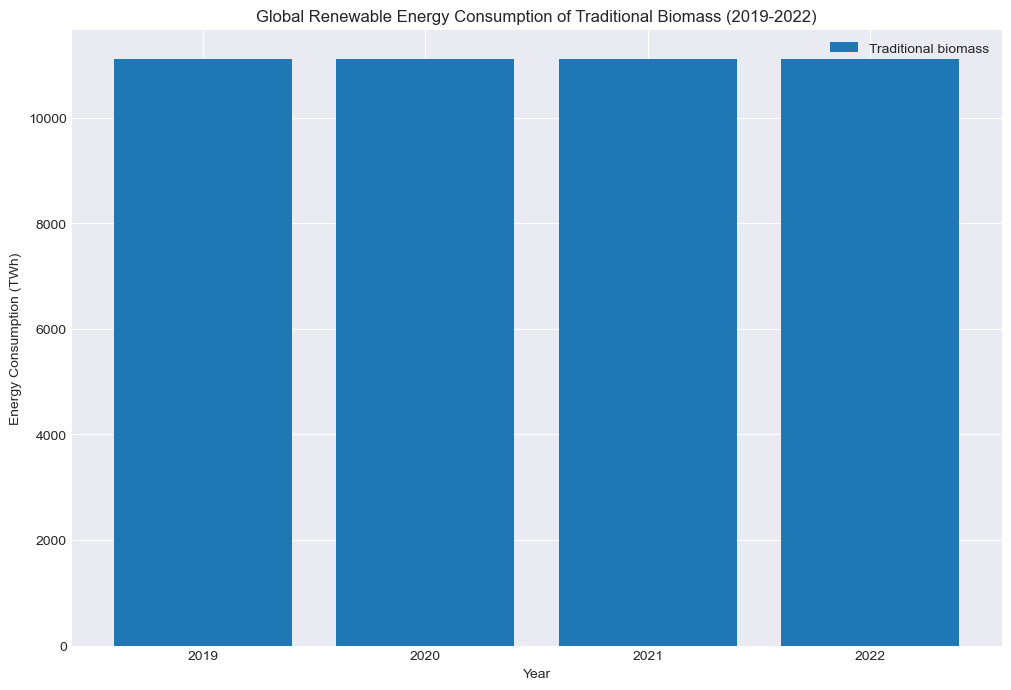

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\myasu\\Downloads\\renewable-energy-consumption.csv"
df = pd.read_csv(file_path)

# Filter data for years 2019 to 2022
df_filtered = df[df['Year'].between(2019, 2022)]

# Sum per year for each energy type
grouped_df = df_filtered.groupby('Year').sum()

# Plot the data as a bar plot
plt.figure(figsize=(12, 8))

# Extracting data for Traditional biomass only
traditional_biomass_data = grouped_df.loc[:, 'Traditional biomass (TWh, direct energy)']

# Plotting as a bar plot
plt.bar(traditional_biomass_data.index.astype(str), traditional_biomass_data, label='Traditional biomass')

# Add title and labels
plt.title('Global Renewable Energy Consumption of Traditional Biomass (2019-2022)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


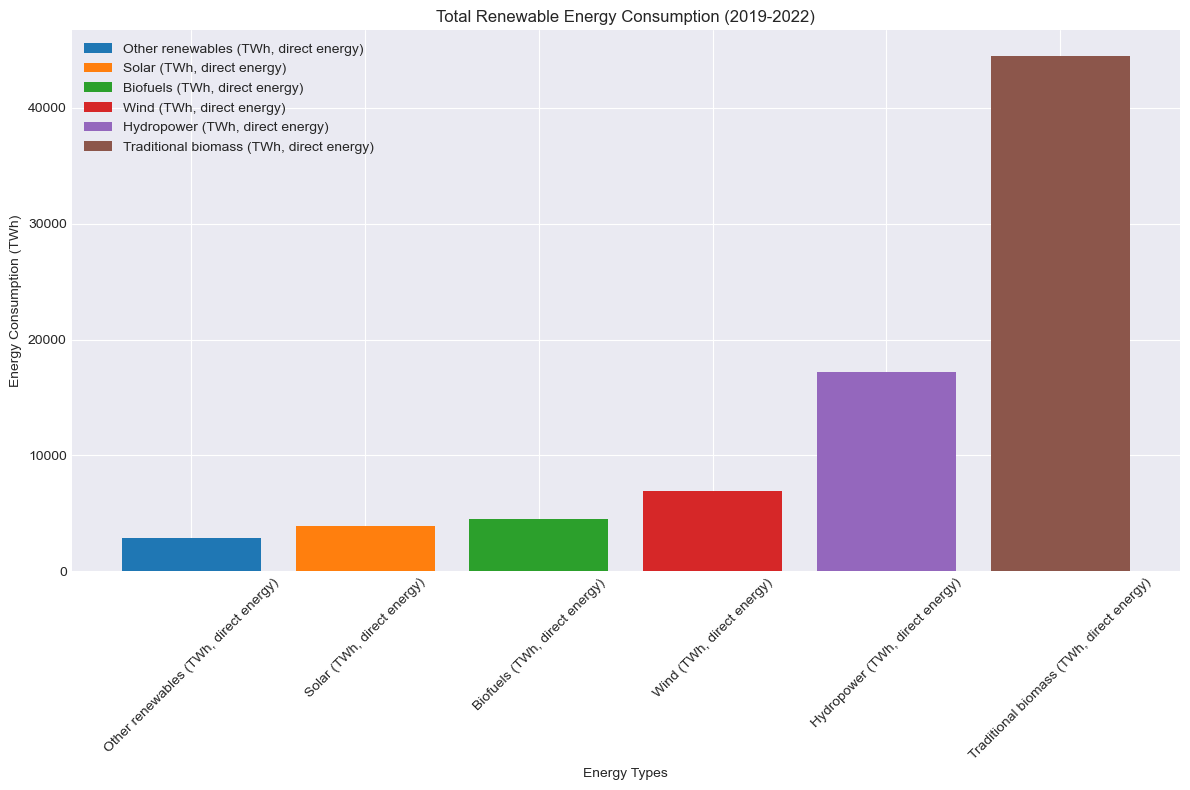

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\myasu\\Downloads\\renewable-energy-consumption.csv"
df = pd.read_csv(file_path)

# Filter data for years 2019 to 2022
df_filtered = df[df['Year'].between(2019, 2022)]

# Summing up energy consumption for each type from 2019 to 2022
sum_energy = df_filtered.groupby('Entity').sum().reset_index()

# Extracting data for each energy type
energy_types = ["Other renewables (TWh, direct energy)", "Solar (TWh, direct energy)",
                "Biofuels (TWh, direct energy)", "Wind (TWh, direct energy)",
                "Hydropower (TWh, direct energy)", "Traditional biomass (TWh, direct energy)"]

# Plotting as a bar plot
plt.figure(figsize=(12, 8))

for i, energy_type in enumerate(energy_types, start=1):
    # Extracting data for current energy type
    energy_data = sum_energy[energy_type].values[0]
    
    # Plotting the bar
    plt.bar(i, energy_data, label=energy_type)

# Adding title and labels
plt.title('Total Renewable Energy Consumption (2019-2022)')
plt.xlabel('Energy Types')
plt.ylabel('Energy Consumption (TWh)')
plt.xticks(range(1, len(energy_types) + 1), energy_types, rotation=45)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


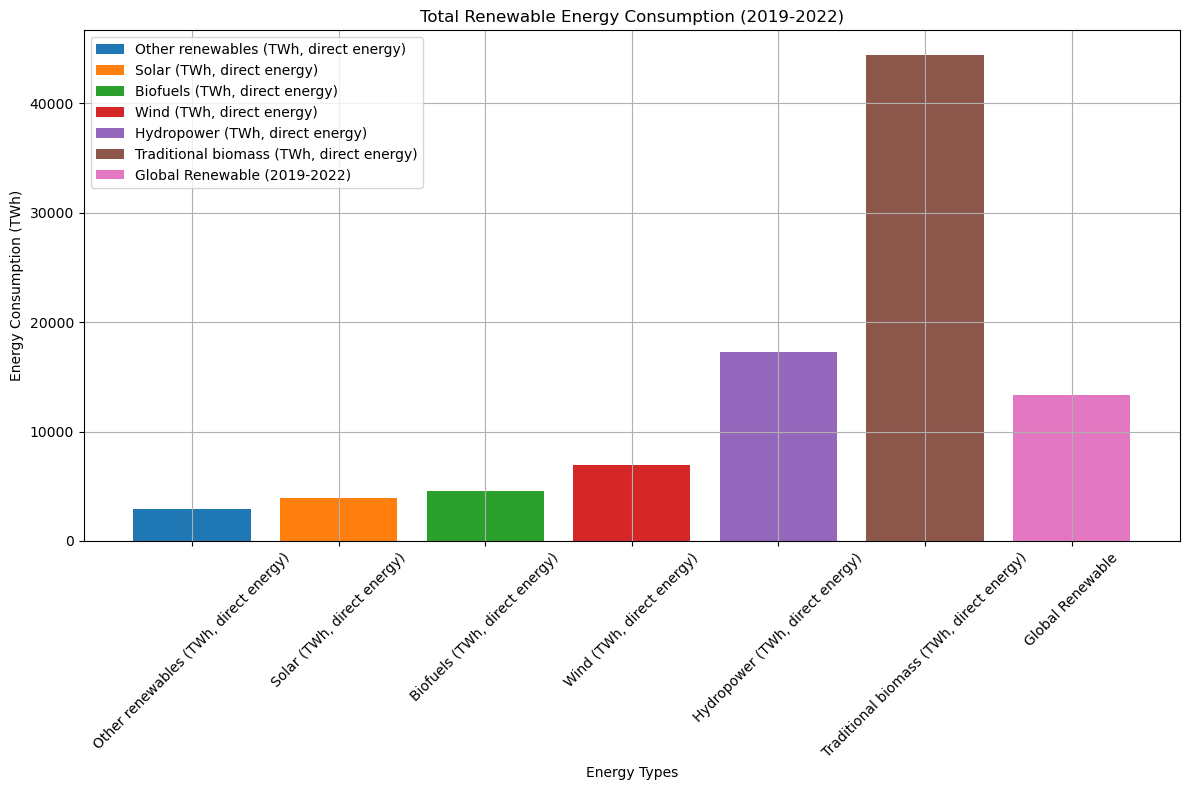

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the first dataset
file_path1 = "C:\\Users\\myasu\\Downloads\\renewable-energy-consumption.csv"
df1 = pd.read_csv(file_path1)

# Filter data for years 2019 to 2022
df_filtered1 = df1[df1['Year'].between(2019, 2022)]

# Summing up energy consumption for each type from 2019 to 2022
sum_energy = df_filtered1.groupby('Entity').sum().reset_index()

# Extracting data for each energy type
energy_types = ["Other renewables (TWh, direct energy)", "Solar (TWh, direct energy)",
                "Biofuels (TWh, direct energy)", "Wind (TWh, direct energy)",
                "Hydropower (TWh, direct energy)", "Traditional biomass (TWh, direct energy)"]

# Load the second dataset
file_path2 = "C:\\Users\\myasu\\Downloads\\sub-energy-fossil-renewables-nuclear.csv"
df2 = pd.read_csv(file_path2)

# Filter data for years 2019 to 2022 and for the World entity
df_filtered2 = df2[(df2['Year'].between(2019, 2022)) & (df2['Entity'] == 'World')]

# Calculate the average percentage of renewables over these years
global_renewable_percentage = df_filtered2['Renewables (% equivalent primary energy)'].mean()

# Assume a total global energy consumption value for calculation (for example, 100000 TWh)
# This is a placeholder value; replace it with actual total energy consumption if available
total_global_energy_consumption = 100000  # Placeholder value

# Calculate global renewable energy consumption in TWh
global_renewable_consumption = (global_renewable_percentage / 100) * total_global_energy_consumption

# Plotting as a bar plot
plt.figure(figsize=(12, 8))

for i, energy_type in enumerate(energy_types, start=1):
    # Extracting data for current energy type
    energy_data = sum_energy[energy_type].values[0]
    
    # Plotting the bar
    plt.bar(i, energy_data, label=energy_type)

# Adding global renewable energy consumption bar
plt.bar(len(energy_types) + 1, global_renewable_consumption, label='Global Renewable (2019-2022)')

# Adding title and labels
plt.title('Total Renewable Energy Consumption (2019-2022)')
plt.xlabel('Energy Types')
plt.ylabel('Energy Consumption (TWh)')
plt.xticks(range(1, len(energy_types) + 2), energy_types + ['Global Renewable'], rotation=45)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


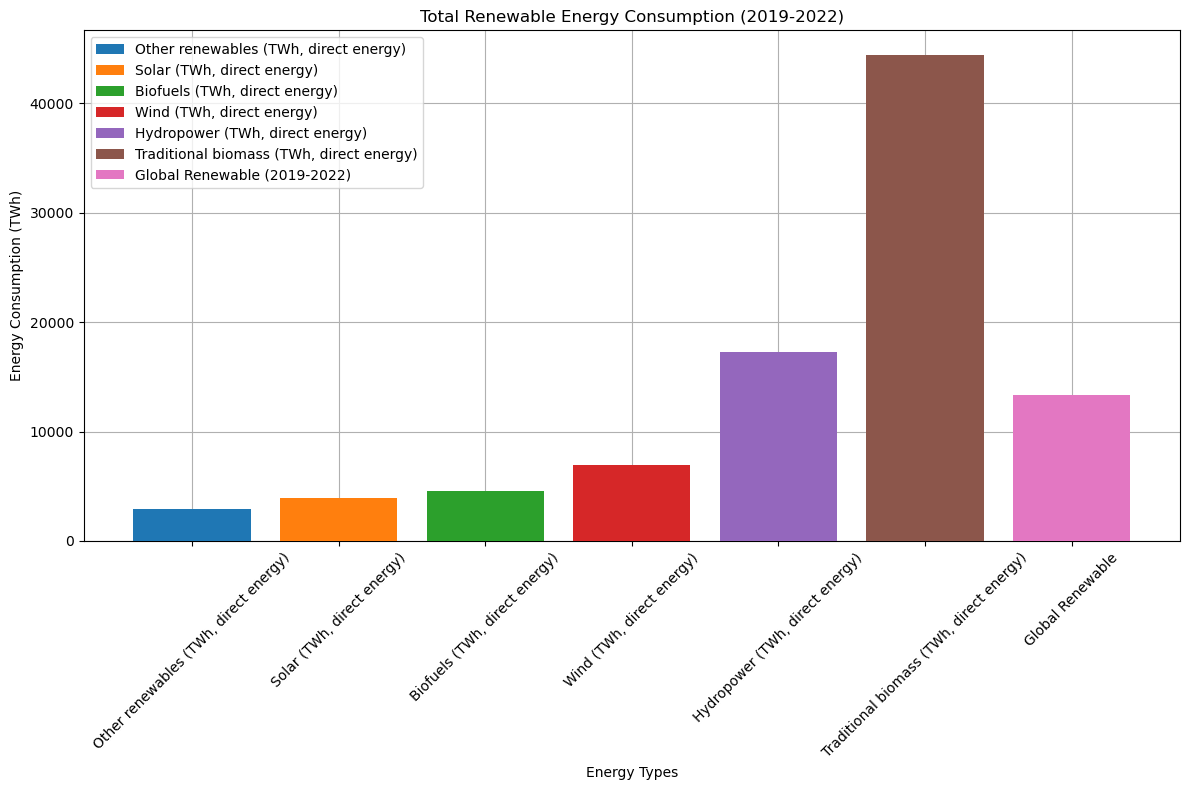

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the first dataset
file_path1 = "C:\\Users\\myasu\\Downloads\\renewable-energy-consumption.csv"
df1 = pd.read_csv(file_path1)

# Filter data for years 2019 to 2022
df_filtered1 = df1[df1['Year'].between(2019, 2022)]

# Summing up energy consumption for each type from 2019 to 2022
sum_energy = df_filtered1.groupby('Entity').sum().reset_index()

# Extracting data for each energy type
energy_types = ["Other renewables (TWh, direct energy)", "Solar (TWh, direct energy)",
                "Biofuels (TWh, direct energy)", "Wind (TWh, direct energy)",
                "Hydropower (TWh, direct energy)", "Traditional biomass (TWh, direct energy)"]

# Load the second dataset
file_path2 = "C:\\Users\\myasu\\Downloads\\sub-energy-fossil-renewables-nuclear.csv"
df2 = pd.read_csv(file_path2)

# Filter data for years 2019 to 2022 and for the World entity
df_filtered2 = df2[(df2['Year'].between(2019, 2022)) & (df2['Entity'] == 'World')]

# Calculate the average percentage of renewables over these years
global_renewable_percentage = df_filtered2['Renewables (% equivalent primary energy)'].mean()

# Assume a total global energy consumption value for calculation (for example, 100000 TWh)
# This is a placeholder value; replace it with actual total energy consumption if available
total_global_energy_consumption = 100000  # Placeholder value

# Calculate global renewable energy consumption in TWh
global_renewable_consumption = (global_renewable_percentage / 100) * total_global_energy_consumption

# Plotting as a bar plot
plt.figure(figsize=(12, 8))

for i, energy_type in enumerate(energy_types, start=1):
    # Extracting data for current energy type
    energy_data = sum_energy[energy_type].values[0]
    
    # Plotting the bar
    plt.bar(i, energy_data, label=energy_type, zorder=3)

# Adding global renewable energy consumption bar
plt.bar(len(energy_types) + 1, global_renewable_consumption, label='Global Renewable (2019-2022)', zorder=3)

# Adding title and labels
plt.title('Total Renewable Energy Consumption (2019-2022)')
plt.xlabel('Energy Types')
plt.ylabel('Energy Consumption (TWh)')
plt.xticks(range(1, len(energy_types) + 2), energy_types + ['Global Renewable'], rotation=45)
plt.legend()

# Ensuring the grid and axes are behind the bars
plt.grid(True, zorder=0)
plt.gca().set_axisbelow(True)

# Show plot
plt.tight_layout()
plt.show()


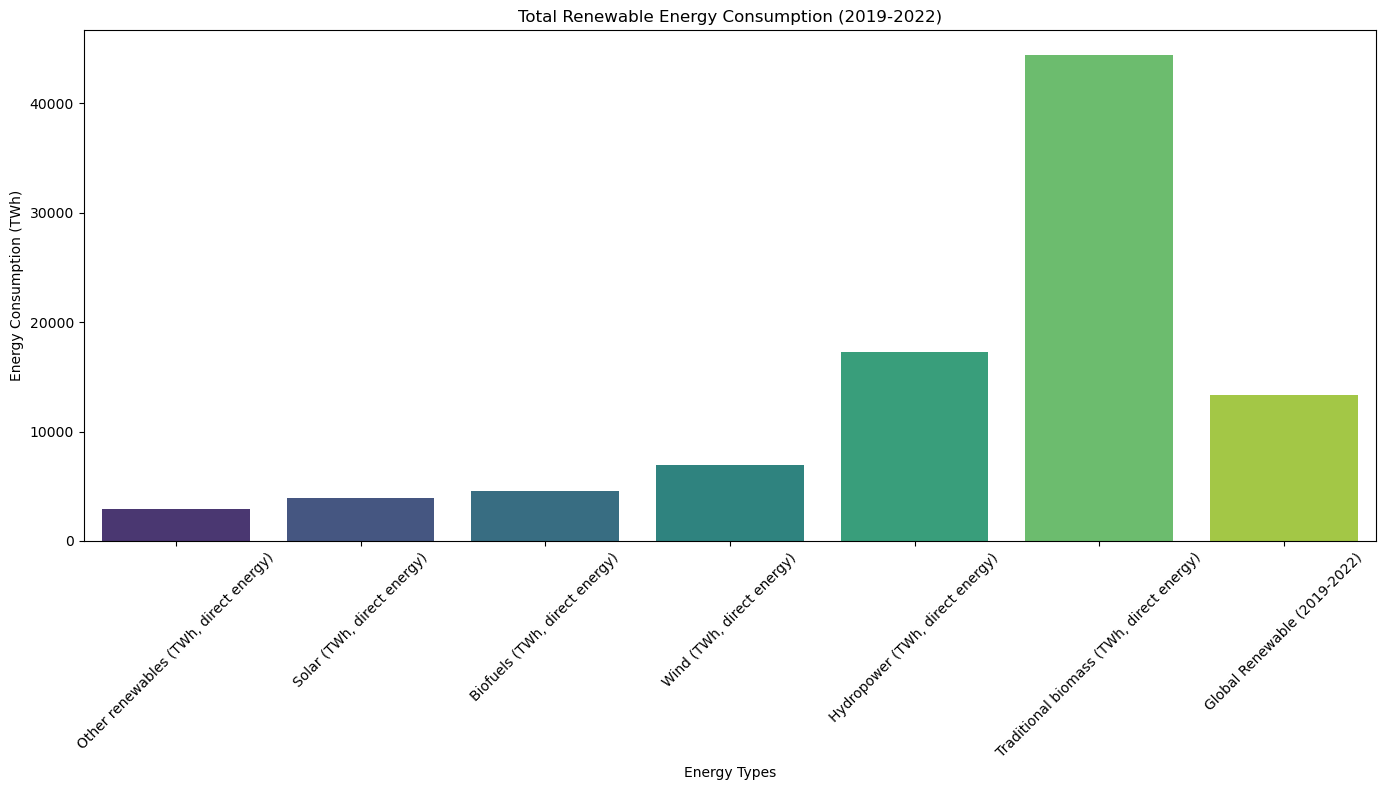

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the first dataset
file_path1 = "C:\\Users\\myasu\\Downloads\\renewable-energy-consumption.csv"
df1 = pd.read_csv(file_path1)

# Filter data for years 2019 to 2022
df_filtered1 = df1[df1['Year'].between(2019, 2022)]

# Summing up energy consumption for each type from 2019 to 2022
sum_energy = df_filtered1.groupby('Entity').sum().reset_index()

# Extracting data for each energy type
energy_types = ["Other renewables (TWh, direct energy)", "Solar (TWh, direct energy)",
                "Biofuels (TWh, direct energy)", "Wind (TWh, direct energy)",
                "Hydropower (TWh, direct energy)", "Traditional biomass (TWh, direct energy)"]

# Load the second dataset
file_path2 = "C:\\Users\\myasu\\Downloads\\sub-energy-fossil-renewables-nuclear.csv"
df2 = pd.read_csv(file_path2)

# Filter data for years 2019 to 2022 and for the World entity
df_filtered2 = df2[(df2['Year'].between(2019, 2022)) & (df2['Entity'] == 'World')]

# Calculate the average percentage of renewables over these years
global_renewable_percentage = df_filtered2['Renewables (% equivalent primary energy)'].mean()

# Assume a total global energy consumption value for calculation (for example, 100000 TWh)
# This is a placeholder value; replace it with actual total energy consumption if available
total_global_energy_consumption = 100000  # Placeholder value

# Calculate global renewable energy consumption in TWh
global_renewable_consumption = (global_renewable_percentage / 100) * total_global_energy_consumption

# Prepare data for plotting
plot_data = sum_energy[energy_types].sum().reset_index()
plot_data.columns = ['Energy Type', 'Energy Consumption (TWh)']
global_renewable_df = pd.DataFrame({'Energy Type': ['Global Renewable (2019-2022)'], 'Energy Consumption (TWh)': [global_renewable_consumption]})
plot_data = pd.concat([plot_data, global_renewable_df], ignore_index=True)

# Plotting with Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='Energy Type', y='Energy Consumption (TWh)', data=plot_data, palette='viridis')

# Adding title and labels
plt.title('Total Renewable Energy Consumption (2019-2022)')
plt.xlabel('Energy Types')
plt.ylabel('Energy Consumption (TWh)')
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


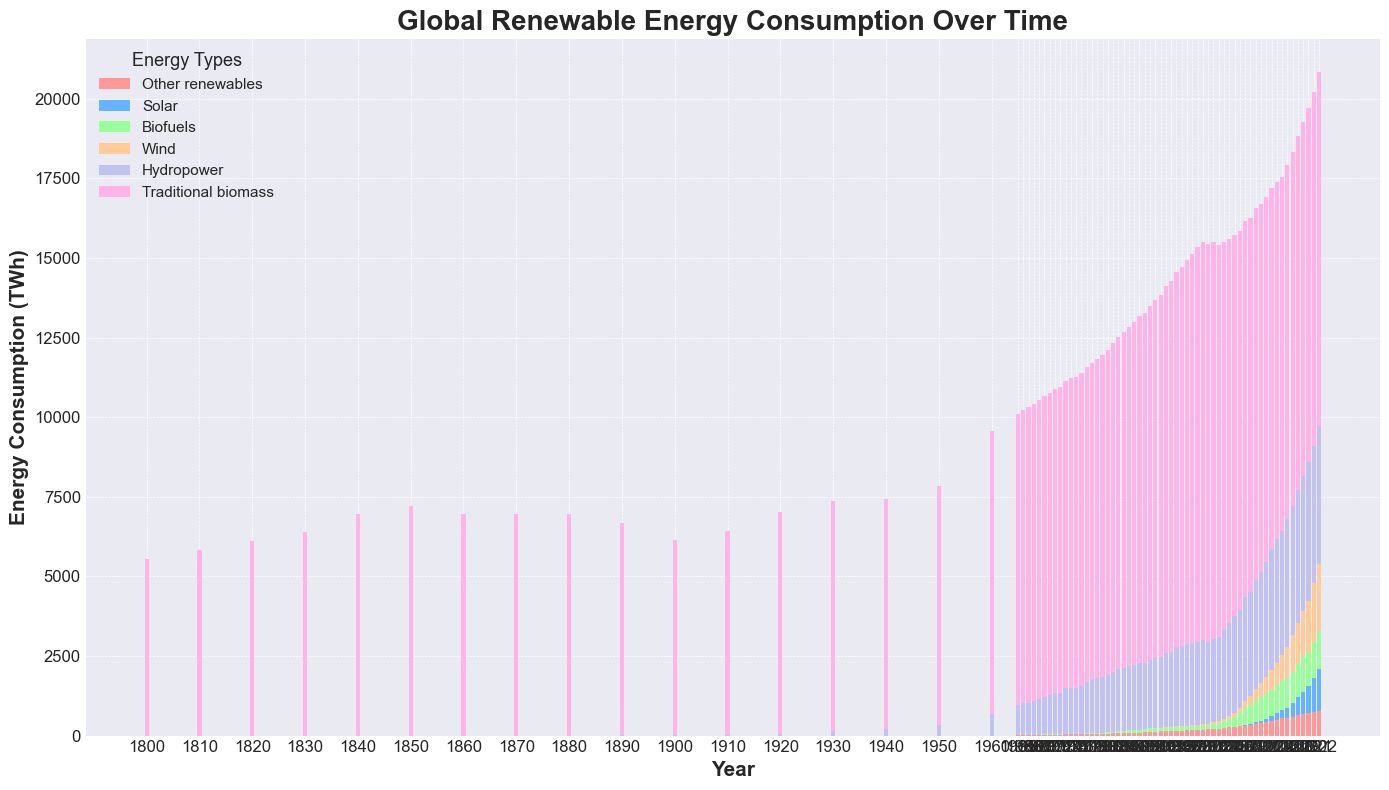

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\myasu\\Downloads\\renewable-energy-consumption.csv"
df = pd.read_csv(file_path)

# Sum per year for each energy type
grouped_df = df.groupby('Year').sum()

# Define colors for each energy type
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Plot the data as a bar plot
plt.figure(figsize=(14, 8))
plt.bar(grouped_df.index, grouped_df['Other renewables (TWh, direct energy)'], 
        color=colors[0], label='Other renewables')
plt.bar(grouped_df.index, grouped_df['Solar (TWh, direct energy)'], 
        bottom=grouped_df['Other renewables (TWh, direct energy)'], color=colors[1], label='Solar')
plt.bar(grouped_df.index, grouped_df['Biofuels (TWh, direct energy)'], 
        bottom=grouped_df['Other renewables (TWh, direct energy)'] + grouped_df['Solar (TWh, direct energy)'],
        color=colors[2], label='Biofuels')
plt.bar(grouped_df.index, grouped_df['Wind (TWh, direct energy)'], 
        bottom=grouped_df['Other renewables (TWh, direct energy)'] + grouped_df['Solar (TWh, direct energy)'] + 
        grouped_df['Biofuels (TWh, direct energy)'],
        color=colors[3], label='Wind')
plt.bar(grouped_df.index, grouped_df['Hydropower (TWh, direct energy)'], 
        bottom=grouped_df['Other renewables (TWh, direct energy)'] + grouped_df['Solar (TWh, direct energy)'] + 
        grouped_df['Biofuels (TWh, direct energy)'] + grouped_df['Wind (TWh, direct energy)'],
        color=colors[4], label='Hydropower')
plt.bar(grouped_df.index, grouped_df['Traditional biomass (TWh, direct energy)'], 
        bottom=grouped_df['Other renewables (TWh, direct energy)'] + grouped_df['Solar (TWh, direct energy)'] + 
        grouped_df['Biofuels (TWh, direct energy)'] + grouped_df['Wind (TWh, direct energy)'] + 
        grouped_df['Hydropower (TWh, direct energy)'],
        color=colors[5], label='Traditional biomass')

# Add title and labels
plt.title('Global Renewable Energy Consumption Over Time', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15, fontweight='bold')
plt.ylabel('Energy Consumption (TWh)', fontsize=15, fontweight='bold')

# Customize legend
plt.legend(title='Energy Types', title_fontsize='13', fontsize='11', loc='upper left')

# Show grid and enhance the layout
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(grouped_df.index, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\myasu\\Downloads\\renewable-energy-consumption.csv"
df = pd.read_csv(file_path)

# Sum the energy consumption for each type across all years
total_consumption = df.groupby('Fuel').sum()

# Extract relevant energy types and their total consumption
energy_types = ['Other renewables (TWh, direct energy)', 'Solar (TWh, direct energy)',
                'Biofuels (TWh, direct energy)', 'Wind (TWh, direct energy)',
                'Hydropower (TWh, direct energy)', 'Traditional biomass (TWh, direct energy)']

# Plot the data as a single bar plot
plt.figure(figsize=(12, 8))

# Plotting each energy type as a single bar
plt.bar(energy_types, total_consumption[energy_types].values.flatten(), color=colors)

# Add title and labels
plt.title('Total Global Renewable Energy Consumption', fontsize=20, fontweight='bold')
plt.xlabel('Energy Types', fontsize=15, fontweight='bold')
plt.ylabel('Total Energy Consumption (TWh)', fontsize=15, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


KeyError: 'Fuel'

C:\Users\myasu\AppData\Local\Temp\ipykernel_5132\1019325325.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


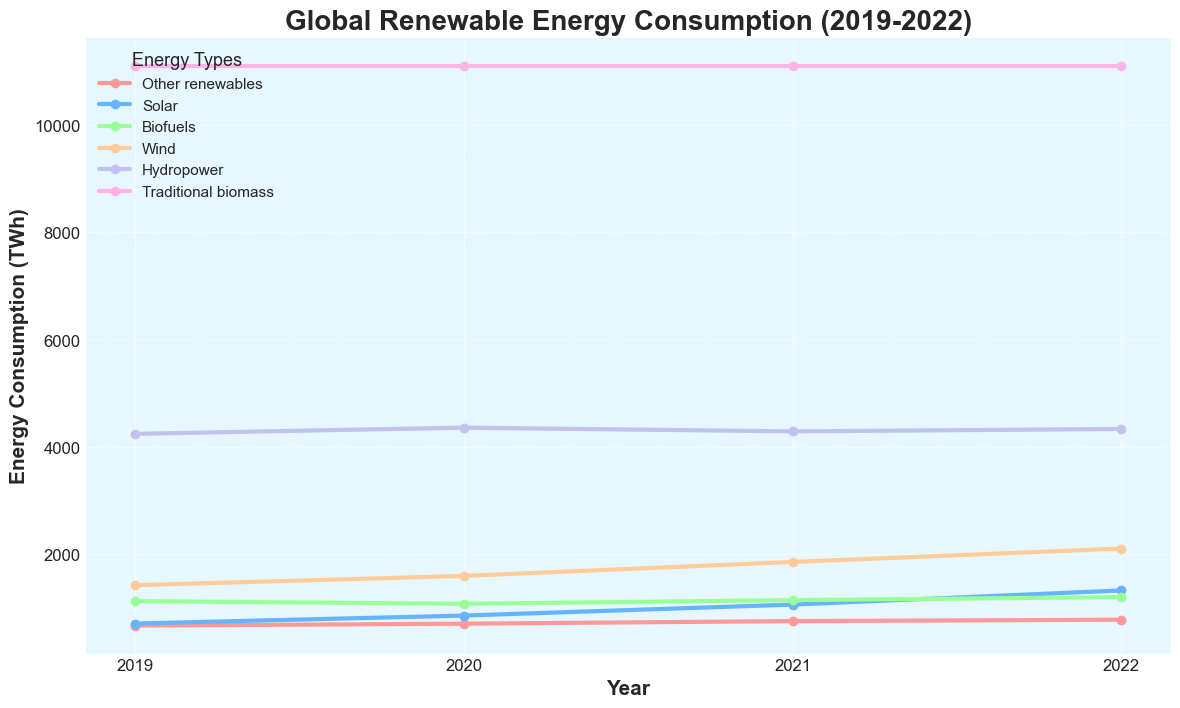

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\myasu\\Downloads\\renewable-energy-consumption.csv"
df = pd.read_csv(file_path)

# Filter data for the years 2019 to 2022
filtered_df = df[(df['Year'] >= 2019) & (df['Year'] <= 2022)]

# Sum per year for each energy type within the specified range
grouped_filtered_df = filtered_df.groupby('Year').sum(numeric_only=True)

# Plot the data with enhanced visualization
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-darkgrid')

# Define colors for each energy type
colors = {
    'Other renewables': '#ff9999',
    'Solar': '#66b3ff',
    'Biofuels': '#99ff99',
    'Wind': '#ffcc99',
    'Hydropower': '#c2c2f0',
    'Traditional biomass': '#ffb3e6'
}
# Set background color to light blue
plt.gca().set_facecolor('#E6F7FF')
# Plot each type of energy with specified colors
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Other renewables (TWh, direct energy)'], 
         label='Other renewables', color=colors['Other renewables'], linewidth=3, marker='o')
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Solar (TWh, direct energy)'], 
         label='Solar', color=colors['Solar'], linewidth=3, marker='o')
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Biofuels (TWh, direct energy)'], 
         label='Biofuels', color=colors['Biofuels'], linewidth=3, marker='o')
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Wind (TWh, direct energy)'], 
         label='Wind', color=colors['Wind'], linewidth=3, marker='o')
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Hydropower (TWh, direct energy)'], 
         label='Hydropower', color=colors['Hydropower'], linewidth=3, marker='o')
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Traditional biomass (TWh, direct energy)'], 
         label='Traditional biomass', color=colors['Traditional biomass'], linewidth=3, marker='o')

# Add title and labels with enhanced formatting
plt.title('Global Renewable Energy Consumption (2019-2022)', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15, fontweight='bold')
plt.ylabel('Energy Consumption (TWh)', fontsize=15, fontweight='bold')

# Customize the legend
plt.legend(title='Energy Types', title_fontsize='13', fontsize='11', loc='upper left')

# Show grid and enhance the layout
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(grouped_filtered_df.index, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [7]:
pip install matplotlib-venn



  Obtaining dependency information for matplotlib-venn from https://files.pythonhosted.org/packages/b1/f4/12ea88962cd17acb58bfcce1b93ce256f591698f9adb247de3eea630f590/matplotlib_venn-0.11.10-py3-none-any.whl.metadata


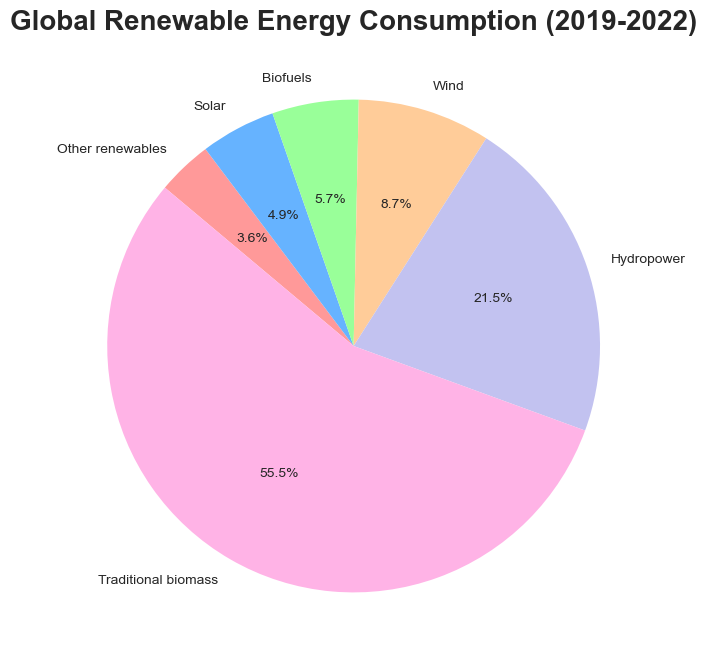

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\myasu\\Downloads\\renewable-energy-consumption.csv"
df = pd.read_csv(file_path)

# Filter data for the years 2019 to 2022
filtered_df = df[(df['Year'] >= 2019) & (df['Year'] <= 2022)]

# Sum per year for each energy type within the specified range
grouped_filtered_df = filtered_df.groupby('Year').sum(numeric_only=True)

# Sum the energy consumption for each type over the years 2019-2022
total_consumption = grouped_filtered_df.sum()

# Define the labels and sizes for the pie chart
labels = ['Other renewables', 'Solar', 'Biofuels', 'Wind', 'Hydropower', 'Traditional biomass']
sizes = [
    total_consumption['Other renewables (TWh, direct energy)'],
    total_consumption['Solar (TWh, direct energy)'],
    total_consumption['Biofuels (TWh, direct energy)'],
    total_consumption['Wind (TWh, direct energy)'],
    total_consumption['Hydropower (TWh, direct energy)'],
    total_consumption['Traditional biomass (TWh, direct energy)']
]

# Define colors for each energy type
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

# Create the pie chart
plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, counterclock=False)

# Add a title
plt.title('Global Renewable Energy Consumption (2019-2022)', fontsize=20, fontweight='bold')

# Show the pie chart
plt.show()


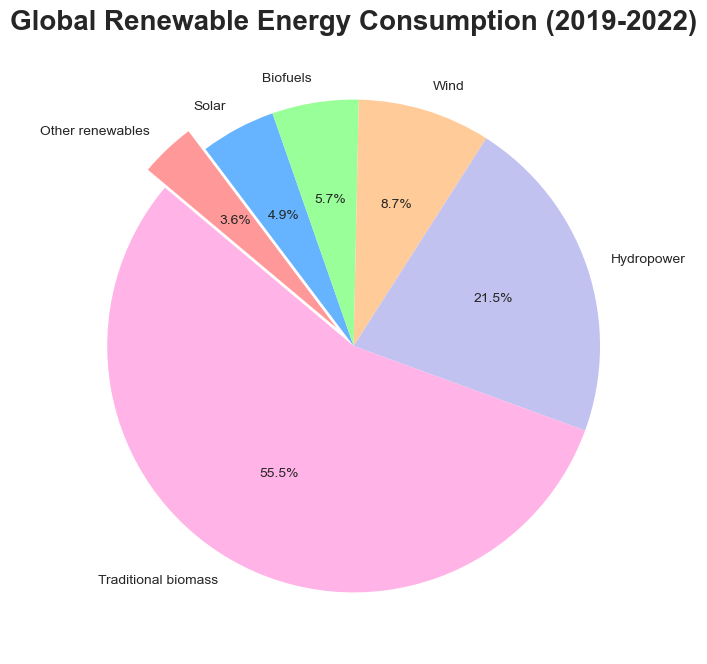

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\myasu\\Downloads\\renewable-energy-consumption.csv"
df = pd.read_csv(file_path)

# Filter data for the years 2019 to 2022
filtered_df = df[(df['Year'] >= 2019) & (df['Year'] <= 2022)]

# Sum per year for each energy type within the specified range
grouped_filtered_df = filtered_df.groupby('Year').sum(numeric_only=True)

# Sum the energy consumption for each type over the years 2019-2022
total_consumption = grouped_filtered_df.sum()

# Define the labels and sizes for the pie chart
labels = ['Other renewables', 'Solar', 'Biofuels', 'Wind', 'Hydropower', 'Traditional biomass']
sizes = [
    total_consumption['Other renewables (TWh, direct energy)'],
    total_consumption['Solar (TWh, direct energy)'],
    total_consumption['Biofuels (TWh, direct energy)'],
    total_consumption['Wind (TWh, direct energy)'],
    total_consumption['Hydropower (TWh, direct energy)'],
    total_consumption['Traditional biomass (TWh, direct energy)']
]

# Define colors for each energy type
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Specify which slice to explode (0-indexed)
explode = (0.1, 0, 0, 0, 0, 0)  # "Explode" the first slice (Other renewables)

# Create the pie chart
plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, counterclock=False, explode=explode)

# Add a title
plt.title('Global Renewable Energy Consumption (2019-2022)', fontsize=20, fontweight='bold')

# Show the pie chart
plt.show()


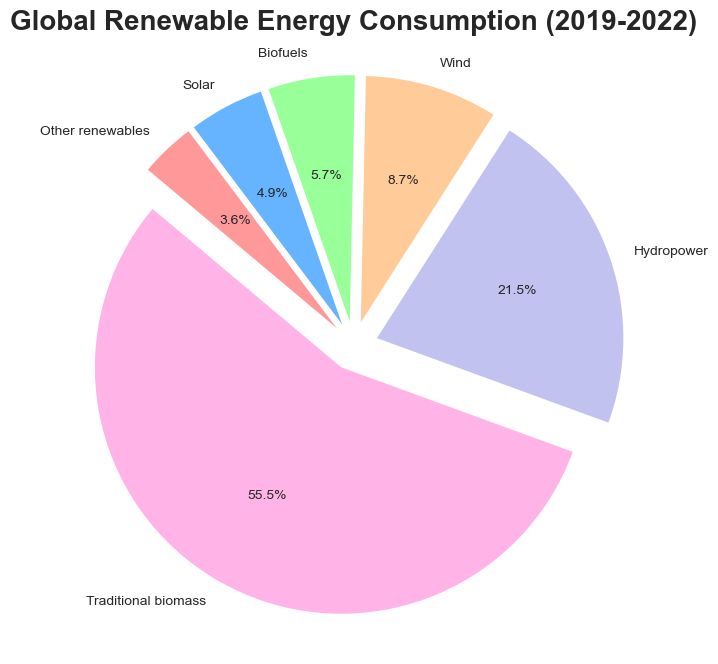

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\myasu\\Downloads\\renewable-energy-consumption.csv"
df = pd.read_csv(file_path)

# Filter data for the years 2019 to 2022
filtered_df = df[(df['Year'] >= 2019) & (df['Year'] <= 2022)]

# Sum per year for each energy type within the specified range
grouped_filtered_df = filtered_df.groupby('Year').sum(numeric_only=True)

# Sum the energy consumption for each type over the years 2019-2022
total_consumption = grouped_filtered_df.sum()

# Define the labels and sizes for the pie chart
labels = ['Other renewables', 'Solar', 'Biofuels', 'Wind', 'Hydropower', 'Traditional biomass']
sizes = [
    total_consumption['Other renewables (TWh, direct energy)'],
    total_consumption['Solar (TWh, direct energy)'],
    total_consumption['Biofuels (TWh, direct energy)'],
    total_consumption['Wind (TWh, direct energy)'],
    total_consumption['Hydropower (TWh, direct energy)'],
    total_consumption['Traditional biomass (TWh, direct energy)']
]

# Define colors for each energy type
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Specify explode values to "explode" all slices
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

# Create the pie chart
plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, counterclock=False, explode=explode)

# Add a title
plt.title('Global Renewable Energy Consumption (2019-2022)', fontsize=20, fontweight='bold')

# Show the pie chart
plt.show()


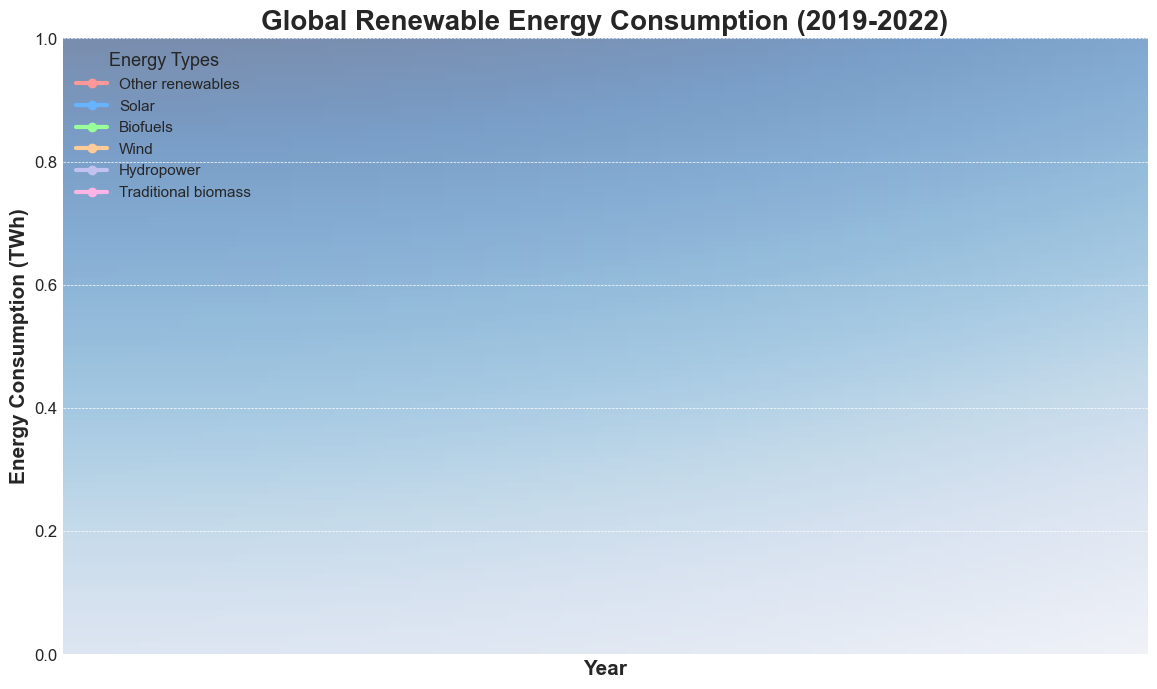

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = "C:\\Users\\myasu\\Downloads\\renewable-energy-consumption.csv"
df = pd.read_csv(file_path)

# Filter data for the years 2019 to 2022
filtered_df = df[(df['Year'] >= 2019) & (df['Year'] <= 2022)]

# Sum per year for each energy type within the specified range
grouped_filtered_df = filtered_df.groupby('Year').sum(numeric_only=True)

# Plot the data with enhanced visualization and custom background
plt.figure(figsize=(14, 8))

# Define colors for each energy type
colors = {
    'Other renewables': '#ff9999',
    'Solar': '#66b3ff',
    'Biofuels': '#99ff99',
    'Wind': '#ffcc99',
    'Hydropower': '#c2c2f0',
    'Traditional biomass': '#ffb3e6'
}

# Create a gradient background
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x = np.linspace(xlim[0], xlim[1], 100)
y = np.linspace(ylim[0], ylim[1], 100)
X, Y = np.meshgrid(x, y)
Z = np.cos(X / 2) + np.sin(Y / 2)

# Plot the gradient background
plt.imshow(Z, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), origin='lower', cmap='Blues', alpha=0.5, aspect='auto')

# Plot each type of energy with specified colors
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Other renewables (TWh, direct energy)'], 
         label='Other renewables', color=colors['Other renewables'], linewidth=3, marker='o')
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Solar (TWh, direct energy)'], 
         label='Solar', color=colors['Solar'], linewidth=3, marker='o')
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Biofuels (TWh, direct energy)'], 
         label='Biofuels', color=colors['Biofuels'], linewidth=3, marker='o')
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Wind (TWh, direct energy)'], 
         label='Wind', color=colors['Wind'], linewidth=3, marker='o')
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Hydropower (TWh, direct energy)'], 
         label='Hydropower', color=colors['Hydropower'], linewidth=3, marker='o')
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Traditional biomass (TWh, direct energy)'], 
         label='Traditional biomass', color=colors['Traditional biomass'], linewidth=3, marker='o')

# Add title and labels with enhanced formatting
plt.title('Global Renewable Energy Consumption (2019-2022)', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15, fontweight='bold')
plt.ylabel('Energy Consumption (TWh)', fontsize=15, fontweight='bold')

# Customize the legend
plt.legend(title='Energy Types', title_fontsize='13', fontsize='11', loc='upper left')

# Show grid and enhance the layout
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(grouped_filtered_df.index, fontsize=12)
plt.yticks(fontsize=12)

# Set the limits back
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Show the plot
plt.show()


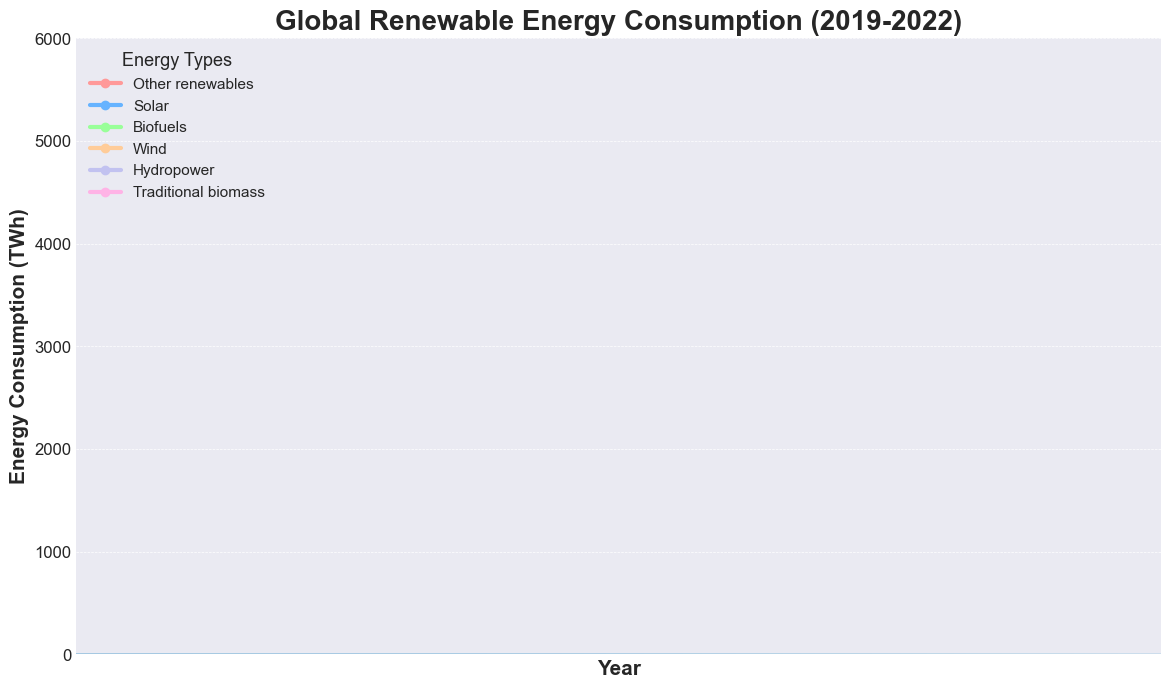

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = "C:\\Users\\myasu\\Downloads\\renewable-energy-consumption.csv"
df = pd.read_csv(file_path)

# Filter data for the years 2019 to 2022
filtered_df = df[(df['Year'] >= 2019) & (df['Year'] <= 2022)]

# Sum per year for each energy type within the specified range
grouped_filtered_df = filtered_df.groupby('Year').sum(numeric_only=True)

# Plot the data with enhanced visualization and custom background
plt.figure(figsize=(14, 8))

# Define colors for each energy type
colors = {
    'Other renewables': '#ff9999',
    'Solar': '#66b3ff',
    'Biofuels': '#99ff99',
    'Wind': '#ffcc99',
    'Hydropower': '#c2c2f0',
    'Traditional biomass': '#ffb3e6'
}

# Create a gradient background
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x = np.linspace(xlim[0], xlim[1], 100)
y = np.linspace(ylim[0], ylim[1], 100)
X, Y = np.meshgrid(x, y)
Z = np.cos(X / 2) + np.sin(Y / 2)

# Plot the gradient background
plt.imshow(Z, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), origin='lower', cmap='Blues', alpha=0.5, aspect='auto')

# Plot each type of energy with specified colors
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Other renewables (TWh, direct energy)'], 
         label='Other renewables', color=colors['Other renewables'], linewidth=3, marker='o')
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Solar (TWh, direct energy)'], 
         label='Solar', color=colors['Solar'], linewidth=3, marker='o')
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Biofuels (TWh, direct energy)'], 
         label='Biofuels', color=colors['Biofuels'], linewidth=3, marker='o')
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Wind (TWh, direct energy)'], 
         label='Wind', color=colors['Wind'], linewidth=3, marker='o')
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Hydropower (TWh, direct energy)'], 
         label='Hydropower', color=colors['Hydropower'], linewidth=3, marker='o')
plt.plot(grouped_filtered_df.index, grouped_filtered_df['Traditional biomass (TWh, direct energy)'], 
         label='Traditional biomass', color=colors['Traditional biomass'], linewidth=3, marker='o')

# Add title and labels with enhanced formatting
plt.title('Global Renewable Energy Consumption (2019-2022)', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15, fontweight='bold')
plt.ylabel('Energy Consumption (TWh)', fontsize=15, fontweight='bold')

# Customize the legend
plt.legend(title='Energy Types', title_fontsize='13', fontsize='11', loc='upper left')

# Show grid and enhance the layout
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(grouped_filtered_df.index, fontsize=12)
plt.yticks(fontsize=12)

# Limit the y-axis to 6000
plt.ylim(0, 6000)

# Set the limits back
ax.set_xlim(xlim)

# Show the plot
plt.show()


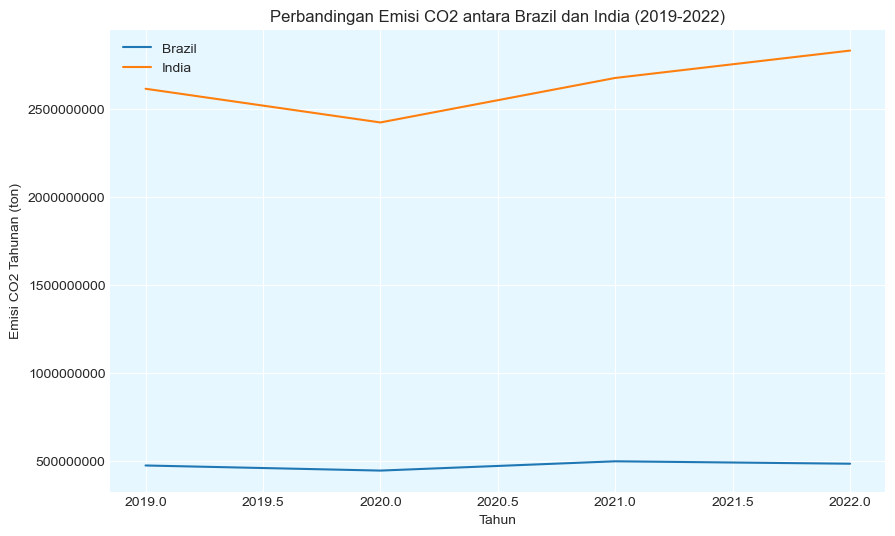

In [17]:
import pandas as pd
import matplotlib.pyplot as plt



# Membaca dataset
df = pd.read_csv(r"C:\Users\myasu\Downloads\annual-co2-emissions-per-country.csv")

# Memfilter data untuk Brasil dan India
df_brazil_india = df[(df['Entity'].isin(['Brazil', 'India']))]

# Memfilter data untuk tahun 2019 hingga 2022
df_brazil_india_recent = df_brazil_india[(df_brazil_india['Year'] >= 2019) & (df_brazil_india['Year'] <= 2022)]

# Membuat plot
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#E6F7FF')
for country in df_brazil_india_recent['Entity'].unique():
    country_data = df_brazil_india_recent[df_brazil_india_recent['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Annual CO₂ emissions'], label=country)

# Menambahkan judul dan label
plt.title('Perbandingan Emisi CO2 antara Brazil dan India (2019-2022)')
plt.xlabel('Tahun')
plt.ylabel('Emisi CO2 Tahunan (ton)')

# Memastikan angka di sumbu y ditampilkan dengan benar tanpa notasi ilmiah
plt.ticklabel_format(style='plain', axis='y')

# Menambahkan legend dan grid
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()


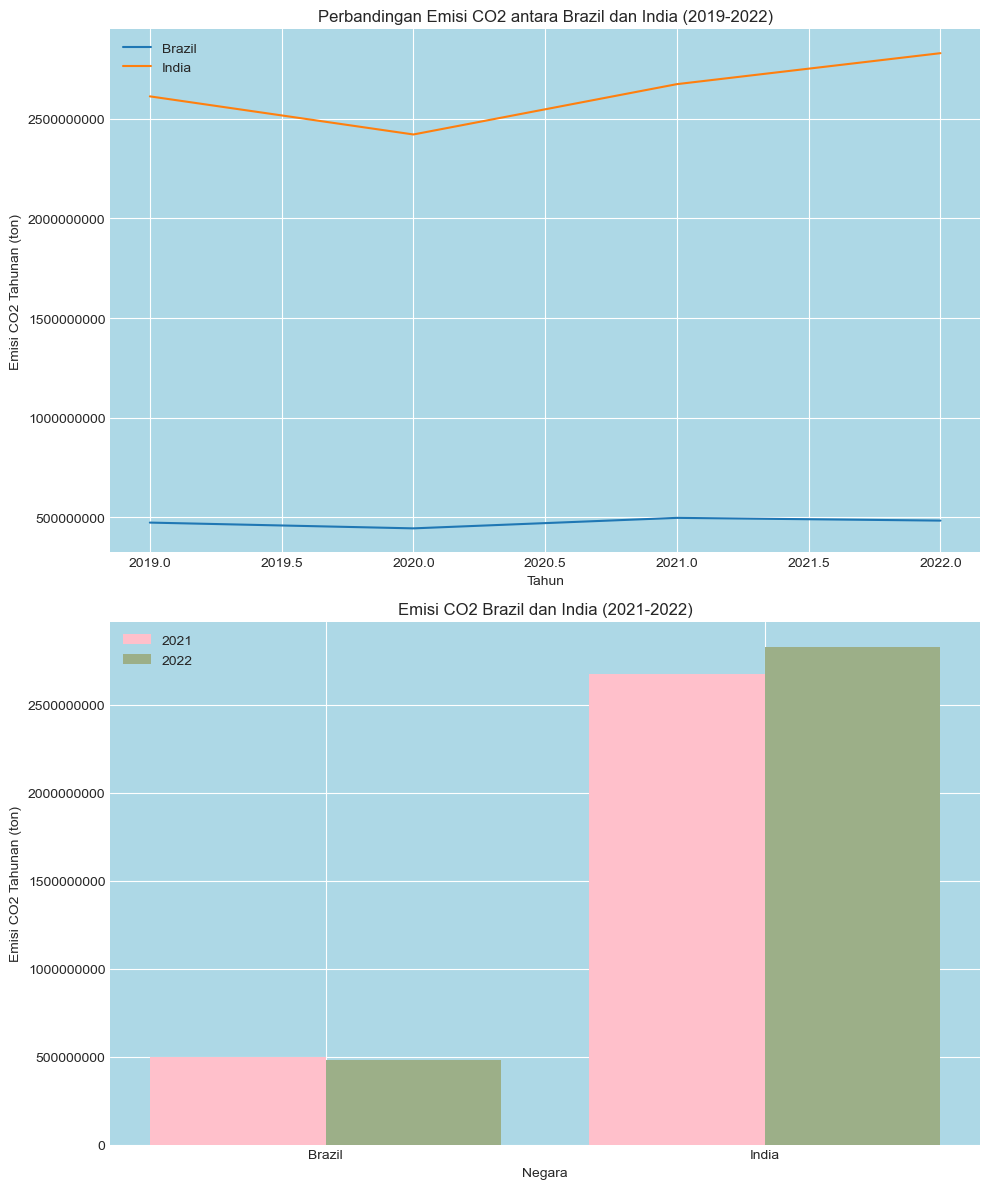

In [22]:
# Membuat figure dan subplot
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Mengatur latar belakang biru muda untuk kedua subplot
axes[0].set_facecolor('lightblue')
axes[1].set_facecolor('lightblue')

# Plot pertama: Garis waktu emisi CO2
for country in df_brazil_india_recent['Entity'].unique():
    country_data = df_brazil_india_recent[df_brazil_india_recent['Entity'] == country]
    axes[0].plot(country_data['Year'], country_data['Annual CO₂ emissions'], label=country)

# Menambahkan judul dan label untuk plot pertama
axes[0].set_title('Perbandingan Emisi CO2 antara Brazil dan India (2019-2022)')
axes[0].set_xlabel('Tahun')
axes[0].set_ylabel('Emisi CO2 Tahunan (ton)')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].legend()
axes[0].grid(True)

# Memfilter data untuk tahun 2021 dan 2022 saja
df_brazil_india_2021_2022 = df_brazil_india_recent[(df_brazil_india_recent['Year'] == 2021) | (df_brazil_india_recent['Year'] == 2022)]

# Plot kedua: Barplot untuk tahun 2021 dan 2022
width = 0.4  # Lebar bar
years = [2021, 2022]
colors = ['pink', '#9caf88']
for i, (year, color) in enumerate(zip(years, colors)):
    year_data = df_brazil_india_2021_2022[df_brazil_india_2021_2022['Year'] == year]
    axes[1].bar([x + (i * width) for x in range(len(year_data))], year_data['Annual CO₂ emissions'], width=width, label=str(year), color=color)

# Menambahkan judul dan label untuk plot kedua
axes[1].set_title('Emisi CO2 Brazil dan India (2021-2022)')
axes[1].set_xlabel('Negara')
axes[1].set_ylabel('Emisi CO2 Tahunan (ton)')
axes[1].set_xticks([x + width / 2 for x in range(len(year_data))])
axes[1].set_xticklabels(year_data['Entity'])
axes[1].ticklabel_format(style='plain', axis='y')
axes[1].legend()
axes[1].grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [1]:
import matplotlib.pyplot as plt

# Define the sectors to highlight with percentages
highlight_sectors = ['Electricity and Heat', 'Transport', 'Manufacturing and Construction', 'Agriculture', 'Fugitive Emissions', 'Industry']

# Function to label the pie chart with percentages only for selected sectors
def autopct_func(pct, allvalues):
    total = sum(allvalues)
    val = int(pct * total / 100.0)
    if val > 0 and val in [sorted_sectors[sector] for sector in highlight_sectors]:
        return f'{pct:.1f}%'
    else:
        return ''

# Explode the 'Electricity and Heat' slice to highlight it
explode = [0.1 if sector == 'Electricity and Heat' else 0 for sector in sorted_sectors.keys()]

# Plotting the pie chart with specific requirements
fig, ax = plt.subplots()
ax.pie(
    sorted_sectors.values(), 
    labels=sorted_sectors.keys(), 
    autopct=lambda pct: autopct_func(pct, sorted_sectors.values()), 
    startangle=90, 
    explode=explode
)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Greenhouse Gas Emissions by Sector (Latest Year)')
plt.show()
``` &#8203;:citation[oaicite:0]{index=0}&#8203;


SyntaxError: invalid syntax (3417229798.py, line 31)

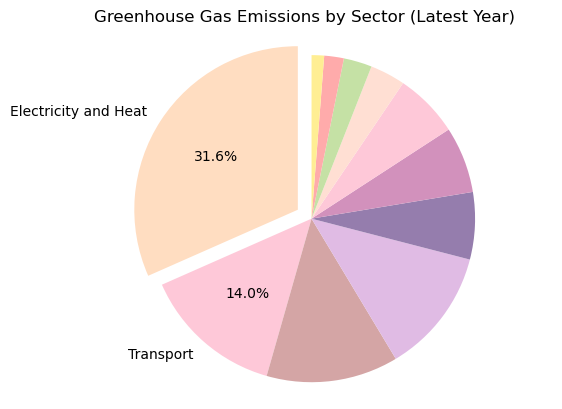

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = "C:\\Users\\myasu\\Downloads\\ghg-emissions-by-sector.csv"

# Load the CSV file
data = pd.read_csv(file_path)

# Sum the emissions for the latest available year
latest_year = data['Year'].max()
latest_data = data[data['Year'] == latest_year]

# Summing up the emissions by sector
sectors = {
    'Agriculture': latest_data['Greenhouse gas emissions from agriculture'].sum(),
    'Land Use Change and Forestry': latest_data['Greenhouse gas emissions from land use change and forestry'].sum(),
    'Waste': latest_data['Greenhouse gas emissions from waste'].sum(),
    'Buildings': latest_data['Greenhouse gas emissions from buildings'].sum(),
    'Industry': latest_data['Greenhouse gas emissions from industry'].sum(),
    'Manufacturing and Construction': latest_data['Greenhouse gas emissions from manufacturing and construction'].sum(),
    'Transport': latest_data['Greenhouse gas emissions from transport'].sum(),
    'Electricity and Heat': latest_data['Greenhouse gas emissions from electricity and heat'].sum(),
    'Fugitive Emissions': latest_data['Fugitive emissions of greenhouse gases from energy production'].sum(),
    'Other Fuel Combustion': latest_data['Greenhouse gas emissions from other fuel combustion'].sum(),
    'Bunker Fuels': latest_data['Greenhouse gas emissions from bunker fuels'].sum()
}

# Sorting the sectors by emission values
sorted_sectors = dict(sorted(sectors.items(), key=lambda item: item[1], reverse=True))

# Calculate percentages for the top 2 sectors
total_emissions = sum(sorted_sectors.values())
electricity_and_heat_pct = (sorted_sectors['Electricity and Heat'] / total_emissions) * 100
transport_pct = (sorted_sectors['Transport'] / total_emissions) * 100

# Define the sectors to highlight with percentages (only the top 2)
highlight_sectors = ['Electricity and Heat', 'Transport']

# Custom colors for the pie chart
colors = [
    '#FFDDC1', '#FEC8D8', '#D4A5A5', '#E0BBE4', '#957DAD',
    '#D291BC', '#FEC8D8', '#FFDFD3', '#C5E1A5', '#FFABAB', '#FFEE93'
]

# Function to label the pie chart with specific percentages for 'Electricity and Heat' and 'Transport'
def autopct_func(pct):
    if round(pct, 1) == round(electricity_and_heat_pct, 1):
        return f'{electricity_and_heat_pct:.1f}%'
    elif round(pct, 1) == round(transport_pct, 1):
        return f'{transport_pct:.1f}%'
    else:
        return ''

# Explode the 'Electricity and Heat' slice to highlight it
explode = [0.1 if sector == 'Electricity and Heat' else 0 for sector in sorted_sectors.keys()]

# Customizing the labels to hide text for all sectors except 'Electricity and Heat' and 'Transport'
def custom_labels(sector):
    if sector in highlight_sectors:
        return sector
    else:
        return ''

# Plotting the pie chart with specific requirements
fig, ax = plt.subplots()
ax.pie(
    sorted_sectors.values(), 
    labels=[custom_labels(sector) for sector in sorted_sectors.keys()], 
    autopct=autopct_func, 
    startangle=90, 
    explode=explode,
    colors=colors
)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Greenhouse Gas Emissions by Sector (Latest Year)')
plt.show()


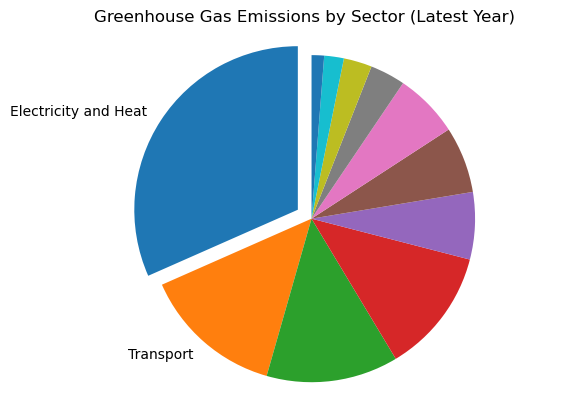

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = "C:\\Users\\myasu\\Downloads\\ghg-emissions-by-sector.csv"

# Load the CSV file
data = pd.read_csv(file_path)

# Sum the emissions for the latest available year
latest_year = data['Year'].max()
latest_data = data[data['Year'] == latest_year]

# Summing up the emissions by sector
sectors = {
    'Agriculture': latest_data['Greenhouse gas emissions from agriculture'].sum(),
    'Land Use Change and Forestry': latest_data['Greenhouse gas emissions from land use change and forestry'].sum(),
    'Waste': latest_data['Greenhouse gas emissions from waste'].sum(),
    'Buildings': latest_data['Greenhouse gas emissions from buildings'].sum(),
    'Industry': latest_data['Greenhouse gas emissions from industry'].sum(),
    'Manufacturing and Construction': latest_data['Greenhouse gas emissions from manufacturing and construction'].sum(),
    'Transport': latest_data['Greenhouse gas emissions from transport'].sum(),
    'Electricity and Heat': latest_data['Greenhouse gas emissions from electricity and heat'].sum(),
    'Fugitive Emissions': latest_data['Fugitive emissions of greenhouse gases from energy production'].sum(),
    'Other Fuel Combustion': latest_data['Greenhouse gas emissions from other fuel combustion'].sum(),
    'Bunker Fuels': latest_data['Greenhouse gas emissions from bunker fuels'].sum()
}

# Sorting the sectors by emission values
sorted_sectors = dict(sorted(sectors.items(), key=lambda item: item[1], reverse=True))

# Define the sectors to highlight with percentages (only the top 2)
highlight_sectors = ['Electricity and Heat', 'Transport']

# Function to label the pie chart with percentages only for selected sectors
def autopct_func(pct, allvalues):
    total = sum(allvalues)
    val = int(pct * total / 100.0)
    if val > 0 and val in [sorted_sectors[sector] for sector in highlight_sectors]:
        return f'{pct:.1f}%'
    else:
        return ''

# Explode the 'Electricity and Heat' slice to highlight it
explode = [0.1 if sector == 'Electricity and Heat' else 0 for sector in sorted_sectors.keys()]

# Customizing the labels to hide text for all sectors except 'Electricity and Heat' and 'Transport'
def custom_labels(sector):
    if sector in highlight_sectors:
        return sector
    else:
        return ''

# Plotting the pie chart with specific requirements
fig, ax = plt.subplots()
ax.pie(
    sorted_sectors.values(), 
    labels=[custom_labels(sector) for sector in sorted_sectors.keys()], 
    autopct=lambda pct: autopct_func(pct, sorted_sectors.values()), 
    startangle=90, 
    explode=explode
)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Greenhouse Gas Emissions by Sector (Latest Year)')
plt.show()
